Cervical Cancer

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [3]:
#importing the file
df=pd.read_csv("cancer_cervical.csv")


In [4]:
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                         4                       15                  1   
1   15                         1                       14                  1   
2   34                         1                        ?                  1   
3   52                         5                       16                  4   
4   46                         3                       21                  4   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0      0              0                   0                       0   
1      0              0                   0                       0   
2      0              0                   0                       0   
3      1             37                  37                       1   
4      0              0                   0                       1   

  Hormonal Contraceptives (years) IUD  ... STDs: Time since first diagnosis  \
0                               0   0  ...                                ?   
1                               0   0  ...                                ?   
2                               0   0  ...                                ?   
3                               3   0  ...                                ?   
4                              15   0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [5]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'Age':
Age
23    59
18    56
19    50
20    49
21    48
24    46
25    46
30    42
26    41
29    40
17    39
28    39
35    36
27    34
33    34
31    33
34    31
22    31
36    28
16    25
15    24
32    20
37    19
41    15
40    13
38    10
39     9
42     7
14     7
43     7
44     6
45     6
46     3
70     2
49     2
48     2
52     2
59     1
79     1
84     1
47     1
13     1
50     1
51     1
Name: count, dtype: int64

Value counts for column 'Number of sexual partners':
Number of sexual partners
2     304
3     241
1     227
4      88
5      48
?      29
6      10
7      10
8       6
9       2
15      1
10      1
28      1
Name: count, dtype: int64

Value counts for column 'First sexual intercourse':
First sexual intercourse
15    179
17    167
18    154
16    136
14     95
19     69
20     41
13     31
21     21
22     11
?      10
23     10
26      8
12      7
27      7
24      7
29      5
28      3
11      2
25      2
10      2
32      1
Name: cou

In [7]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

EDA

In [8]:
df.shape

(968, 36)

REPLACING ? WITH NaN

In [9]:
df=df.replace('?',np.nan)

In [10]:
df.isnull().sum()

Age                                     0
Number of sexual partners              29
First sexual intercourse               10
Num of pregnancies                     70
Smokes                                 16
Smokes (years)                         16
Smokes (packs/year)                    16
Hormonal Contraceptives               122
Hormonal Contraceptives (years)       122
IUD                                   133
IUD (years)                           133
STDs                                  122
STDs (number)                         122
STDs:condylomatosis                   122
STDs:cervical condylomatosis          122
STDs:vaginal condylomatosis           122
STDs:vulvo-perineal condylomatosis    122
STDs:syphilis                         122
STDs:pelvic inflammatory disease      122
STDs:genital herpes                   122
STDs:molluscum contagiosum            122
STDs:AIDS                             122
STDs:HIV                              122
STDs:Hepatitis B                  

In [11]:
df['STDs (number)'].value_counts()

STDs (number)
0    758
2     40
1     39
3      8
4      1
Name: count, dtype: int64

DROPPING STDs: Time since first diagnosis and STDs: Time since last diagnosis

In [12]:
df['STDs: Time since first diagnosis'].value_counts()

STDs: Time since first diagnosis
1     17
2     11
3     10
4      7
7      5
16     5
8      4
5      4
6      3
11     3
21     2
19     2
9      1
12     1
10     1
15     1
22     1
18     1
Name: count, dtype: int64

In [13]:
df['STDs: Time since last diagnosis'].value_counts()

STDs: Time since last diagnosis
1     19
2     12
3      9
4      7
7      5
16     5
8      4
5      3
6      3
11     3
21     2
9      1
12     1
19     1
10     1
15     1
22     1
18     1
Name: count, dtype: int64

If you analyze, the above two features has more number of missing values. So, imputing these missing values won't have that much effect,because it has more than 80% missing values. So, we remove these columns.

In [14]:
df=df.drop(columns='STDs: Time since last diagnosis')

In [15]:
df=df.drop(columns='STDs: Time since first diagnosis')

In [16]:
len(df.columns)

34

CONVERTING THE DATA TYPE OF COLUMNS TO NUMERIC

In [17]:
df=df.apply(pd.to_numeric)


In [18]:
df.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

Now, all are Float and int types.

In [19]:
df['Age'].value_counts()

Age
23    59
18    56
19    50
20    49
21    48
24    46
25    46
30    42
26    41
29    40
17    39
28    39
35    36
27    34
33    34
31    33
34    31
22    31
36    28
16    25
15    24
32    20
37    19
41    15
40    13
38    10
39     9
42     7
14     7
43     7
44     6
45     6
46     3
70     2
49     2
48     2
52     2
59     1
79     1
84     1
47     1
13     1
50     1
51     1
Name: count, dtype: int64

In [20]:
df['Number of sexual partners']

0      4.0
1      1.0
2      1.0
3      5.0
4      3.0
      ... 
963    3.0
964    2.0
965    2.0
966    2.0
967    2.0
Name: Number of sexual partners, Length: 968, dtype: float64

FILLING MISSING VALUES WITH MEAN

In [21]:
m1=df['Number of sexual partners'].mean()
m1=round(m1)
df['Number of sexual partners'].fillna(m1,inplace=True)

In [22]:
m2=df["First sexual intercourse"].mean()
m2=round(m2)

for index,row in df.iterrows():
  if pd.isnull(row['First sexual intercourse']):
    age_ans=row['Age']
    if m2<age_ans:
      df['First sexual intercourse'].fillna(age_ans,inplace=True)

df['First sexual intercourse'].fillna(m2,inplace=True)

In [23]:
m3=df['Num of pregnancies'].mean()
m3=round(m3)
df['Num of pregnancies'].fillna(m3,inplace=True)

In [24]:
m4=df['Smokes'].median()
df['Smokes'].fillna(m4,inplace=True)

In [25]:
m5=df['Smokes (years)'].mean()
m5=round(m5)
df['Smokes (years)'].fillna(m5,inplace=True)

In [26]:

m6=df['Smokes (packs/year)'].mean()
df['Smokes (packs/year)'].fillna(m6,inplace=True)


In [27]:
m7=df['Hormonal Contraceptives'].mean()
m7=round(m7)
df['Hormonal Contraceptives'].fillna(m7,inplace=True)

In [28]:
m8=df['Hormonal Contraceptives (years)'].mean()
m8=round(m8)
df['Hormonal Contraceptives (years)'].fillna(m8,inplace=True)

In [29]:
m9=df['IUD'].mean()
m9=round(m9)
df['IUD'].fillna(m9,inplace=True)

In [30]:
m10=df['IUD (years)'].mean()
df['IUD (years)'].fillna(m10,inplace=True)

Now all the STDs has mean as 0 so, first we impute them and using SMOTE we just increase the 1's count

In [31]:
df['STDs'].fillna(round(df['STDs'].mean()),inplace=True)

In [32]:
df['STDs (number)'].fillna(round(df['STDs (number)'].mean()),inplace=True)

In [33]:
df['STDs:condylomatosis'].fillna(round(df['STDs:condylomatosis'].mean()),inplace=True)

In [34]:
df['STDs:cervical condylomatosis'].fillna(round(df['STDs:cervical condylomatosis'].mean()),inplace=True)

In [35]:
df['STDs:vaginal condylomatosis'].fillna(round(df['STDs:vaginal condylomatosis'].mean()),inplace=True)

In [36]:
df['STDs:vulvo-perineal condylomatosis'].fillna(round(df['STDs:vulvo-perineal condylomatosis'].mean()),inplace=True)

In [37]:
df['STDs:syphilis'].fillna(round(df['STDs:syphilis'].mean()),inplace=True)

In [38]:
df['STDs:pelvic inflammatory disease'].fillna(round(df['STDs:pelvic inflammatory disease'].mean()),inplace=True)

In [39]:
df['STDs:genital herpes'].fillna(round(df['STDs:genital herpes'].mean()),inplace=True)

In [40]:
df['STDs:molluscum contagiosum'].fillna(round(df['STDs:molluscum contagiosum'].mean()),inplace=True)

In [41]:
df['STDs:AIDS'].fillna(df['STDs:AIDS'].mean(),inplace=True)

In [42]:
df['STDs:HIV'].fillna(round(df['STDs:HIV'].mean()),inplace=True)

In [43]:
df['STDs:Hepatitis B'].fillna(round(df['STDs:Hepatitis B'].mean()),inplace=True)

In [44]:
df['STDs:HPV'].fillna(round(df['STDs:HPV'].mean()),inplace=True)

NOW THERE ARE NO NULL VALUES

OUTLIER ANALYSIS

<ipython-input-45-8b8b54cd1cf8>:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


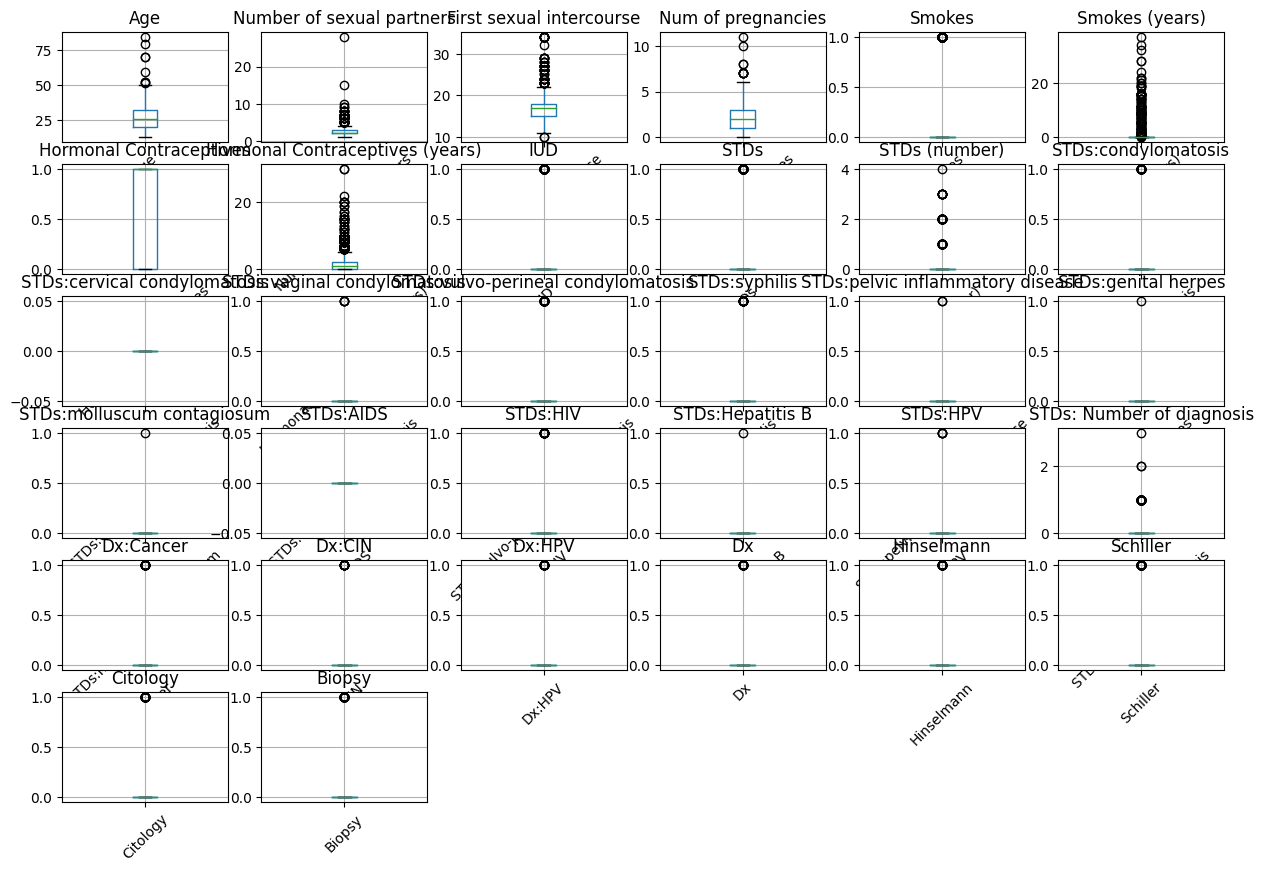

In [45]:
# List of columns for outlier analysis
columns_of_interest = ['Age','Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes', 'Smokes (years)',
                       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                        'STDs', 'STDs (number)', 'STDs:condylomatosis',
                       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
                       'Citology', 'Biopsy']

# Plot boxplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(6, 6, i)
    df.boxplot(column)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


MORE CORRELATION WITH TARGET VARIABLES

In [46]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with target variables
target_correlations = correlation_matrix[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']]

# Sort correlations in descending order
sorted_correlations = target_correlations.abs().sort_values(by=['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], ascending=False)

print(sorted_correlations)


                                    Hinselmann  Schiller  Citology    Biopsy
Hinselmann                            1.000000  0.649703  0.193170  0.560537
Schiller                              0.649703  1.000000  0.367741  0.735358
Biopsy                                0.560537  0.735358  0.323653  1.000000
Citology                              0.193170  0.367741  1.000000  0.323653
Dx:HPV                                0.143100  0.148822  0.086179  0.154942
Dx:Cancer                             0.138818  0.143758  0.082859  0.150037
Dx                                    0.084084  0.093361  0.063592  0.146002
STDs:HIV                              0.082827  0.139698  0.097355  0.141656
STDs: Number of diagnosis             0.066823  0.125936  0.058181  0.096623
STDs (number)                         0.063371  0.133414  0.075044  0.111684
IUD                                   0.061460  0.105606  0.003946  0.060921
Smokes (years)                        0.057299  0.073111  0.015648  0.044488

SMOTE TECHNIQUE FOR MAKING THE DATASET BALANCED

In [47]:
df=df.drop(columns='STDs:AIDS')

In [48]:
df=df.drop(columns='STDs:cervical condylomatosis')

In [49]:
target=['Hinselmann','Schiller','Citology']
df=df.drop(columns=target)

<Axes: xlabel='Biopsy', ylabel='count'>

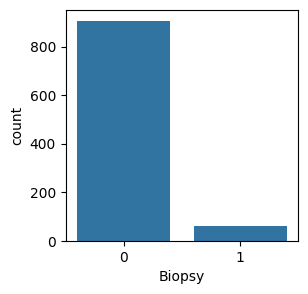

In [50]:
plt.figure(figsize=(3,3))
sns.countplot(x='Biopsy',data=df)


In [51]:
from imblearn.over_sampling import SMOTE
features=df.drop('Biopsy',axis=1)
target_column=df['Biopsy']
X_resamp,y_resamp=SMOTE(random_state=42).fit_resample(features,target_column)

In [52]:
print('Original sample:',np.unique(target_column,return_counts=True))
print("After SMOTE:",np.unique(y_resamp,return_counts=True))

Original sample: (array([0, 1]), array([907,  61]))
After SMOTE: (array([0, 1]), array([907, 907]))


In [53]:
# Convert resampled features to DataFrame
X_resamp_df = pd.DataFrame(X_resamp, columns=features.columns)

# Convert resampled target column to Series
y_resamp_series = pd.Series(y_resamp, name='Biopsy')

# Ensure that the resampled target column is in integer format
y_resamp_series = y_resamp_series.astype(int)

# Concatenate resampled features and target column
df = pd.concat([X_resamp_df, y_resamp_series], axis=1)

In [54]:
df = pd.concat([X_resamp, y_resamp], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1814 non-null   int64  
 1   Number of sexual partners           1814 non-null   float64
 2   First sexual intercourse            1814 non-null   float64
 3   Num of pregnancies                  1814 non-null   float64
 4   Smokes                              1814 non-null   float64
 5   Smokes (years)                      1814 non-null   float64
 6   Smokes (packs/year)                 1814 non-null   float64
 7   Hormonal Contraceptives             1814 non-null   float64
 8   Hormonal Contraceptives (years)     1814 non-null   float64
 9   IUD                                 1814 non-null   float64
 10  IUD (years)                         1814 non-null   float64
 11  STDs                                1814 no

<Axes: xlabel='Biopsy', ylabel='count'>

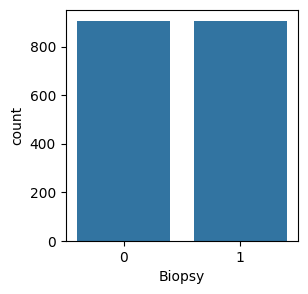

In [55]:
plt.figure(figsize=(3,3))
sns.countplot(x='Biopsy',data=df)


In [56]:
import os
df.to_csv('cleaned_df',index=False)

In [57]:
df=pd.read_csv("cleaned_df")

In [58]:
df

Age  Number of sexual partners  First sexual intercourse  \
0      18                   4.000000                 15.000000   
1      15                   1.000000                 14.000000   
2      34                   1.000000                 34.000000   
3      52                   5.000000                 16.000000   
4      46                   3.000000                 21.000000   
...   ...                        ...                       ...   
1809   33                   3.000000                 18.483546   
1810   18                   1.805993                 16.805993   
1811   16                   1.449773                 13.349320   
1812   39                   1.086825                 18.000000   
1813   25                   6.000000                 17.000000   

      Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0               1.000000  0.000000        0.000000             0.000000   
1               1.000000  0.000000        0.000000             0.000000   
2               1.000000  0.000000        0.000000             0.000000   
3               4.000000  1.000000       37.000000            37.000000   
4               4.000000  0.000000        0.000000             0.000000   
...                  ...       ...             ...                  ...   
1809            2.483546  0.000000        0.516454             0.231072   
1810            1.805993  0.194007        0.388015             0.009700   
1811            1.550227  0.000000        0.000000             0.000000   
1812            1.043413  0.000000        0.043413             0.019424   
1813            2.000000  0.000000        0.000000             0.000000   

      Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  ...  \
0                    0.000000                         0.000000  0.000000  ...   
1                    0.000000                         0.000000  0.000000  ...   
2                    0.000000                         0.000000  0.000000  ...   
3                    1.000000                         3.000000  0.000000  ...   
4                    1.000000                        15.000000  0.000000  ...   
...                       ...                              ...       ...  ...   
1809                 0.483546                         0.077367  0.483546  ...   
1810                 0.000000                         0.000000  0.000000  ...   
1811                 0.550227                         0.231095  0.000000  ...   
1812                 0.956587                         0.239147  0.000000  ...   
1813                 1.000000                         2.000000  0.000000  ...   

      STDs:molluscum contagiosum  STDs:HIV  STDs:Hepatitis B  STDs:HPV  \
0                            0.0       0.0               0.0       0.0   
1                            0.0       0.0               0.0       0.0   
2                            0.0       0.0               0.0       0.0   
3                            0.0       0.0               0.0       0.0   
4                            0.0       0.0               0.0       0.0   
...                          ...       ...               ...       ...   
1809                         0.0       0.0               0.0       0.0   
1810                         0.0       0.0               0.0       0.0   
1811                         0.0       0.0               0.0       0.0   
1812                         0.0       0.0               0.0       0.0   
1813                         0.0       1.0               0.0       0.0   

      STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Biopsy  
0                             0          0       0       0   0       0  
1                             0          0       0       0   0       0  
2                             0          0       0       0   0       0  
3                             0          1       0       1   0       0  
4                             0          0       0       0   0       0  
...         

In [59]:
df=df.round()

In [60]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'Age':
Age
28    144
20    139
21    122
33    110
18     94
19     87
25     78
27     70
24     68
23     66
17     64
22     60
35     59
34     59
26     59
29     57
30     54
38     51
16     50
31     45
36     41
37     27
32     27
15     24
39     24
41     21
40     20
42     13
43     12
47     11
45     10
44     10
48      8
46      7
14      7
50      3
49      3
51      2
52      2
70      2
59      1
79      1
84      1
13      1
Name: count, dtype: int64

Value counts for column 'Number of sexual partners':
Number of sexual partners
3.0     533
2.0     529
1.0     390
4.0     220
5.0     105
6.0      16
7.0      10
8.0       6
9.0       2
15.0      1
10.0      1
28.0      1
Name: count, dtype: int64

Value counts for column 'First sexual intercourse':
First sexual intercourse
18.0    374
17.0    350
15.0    297
16.0    266
14.0    149
19.0    148
20.0     50
13.0     48
21.0     24
12.0     18
22.0     17
23.0     14
34.0     10
27.0      9
24.

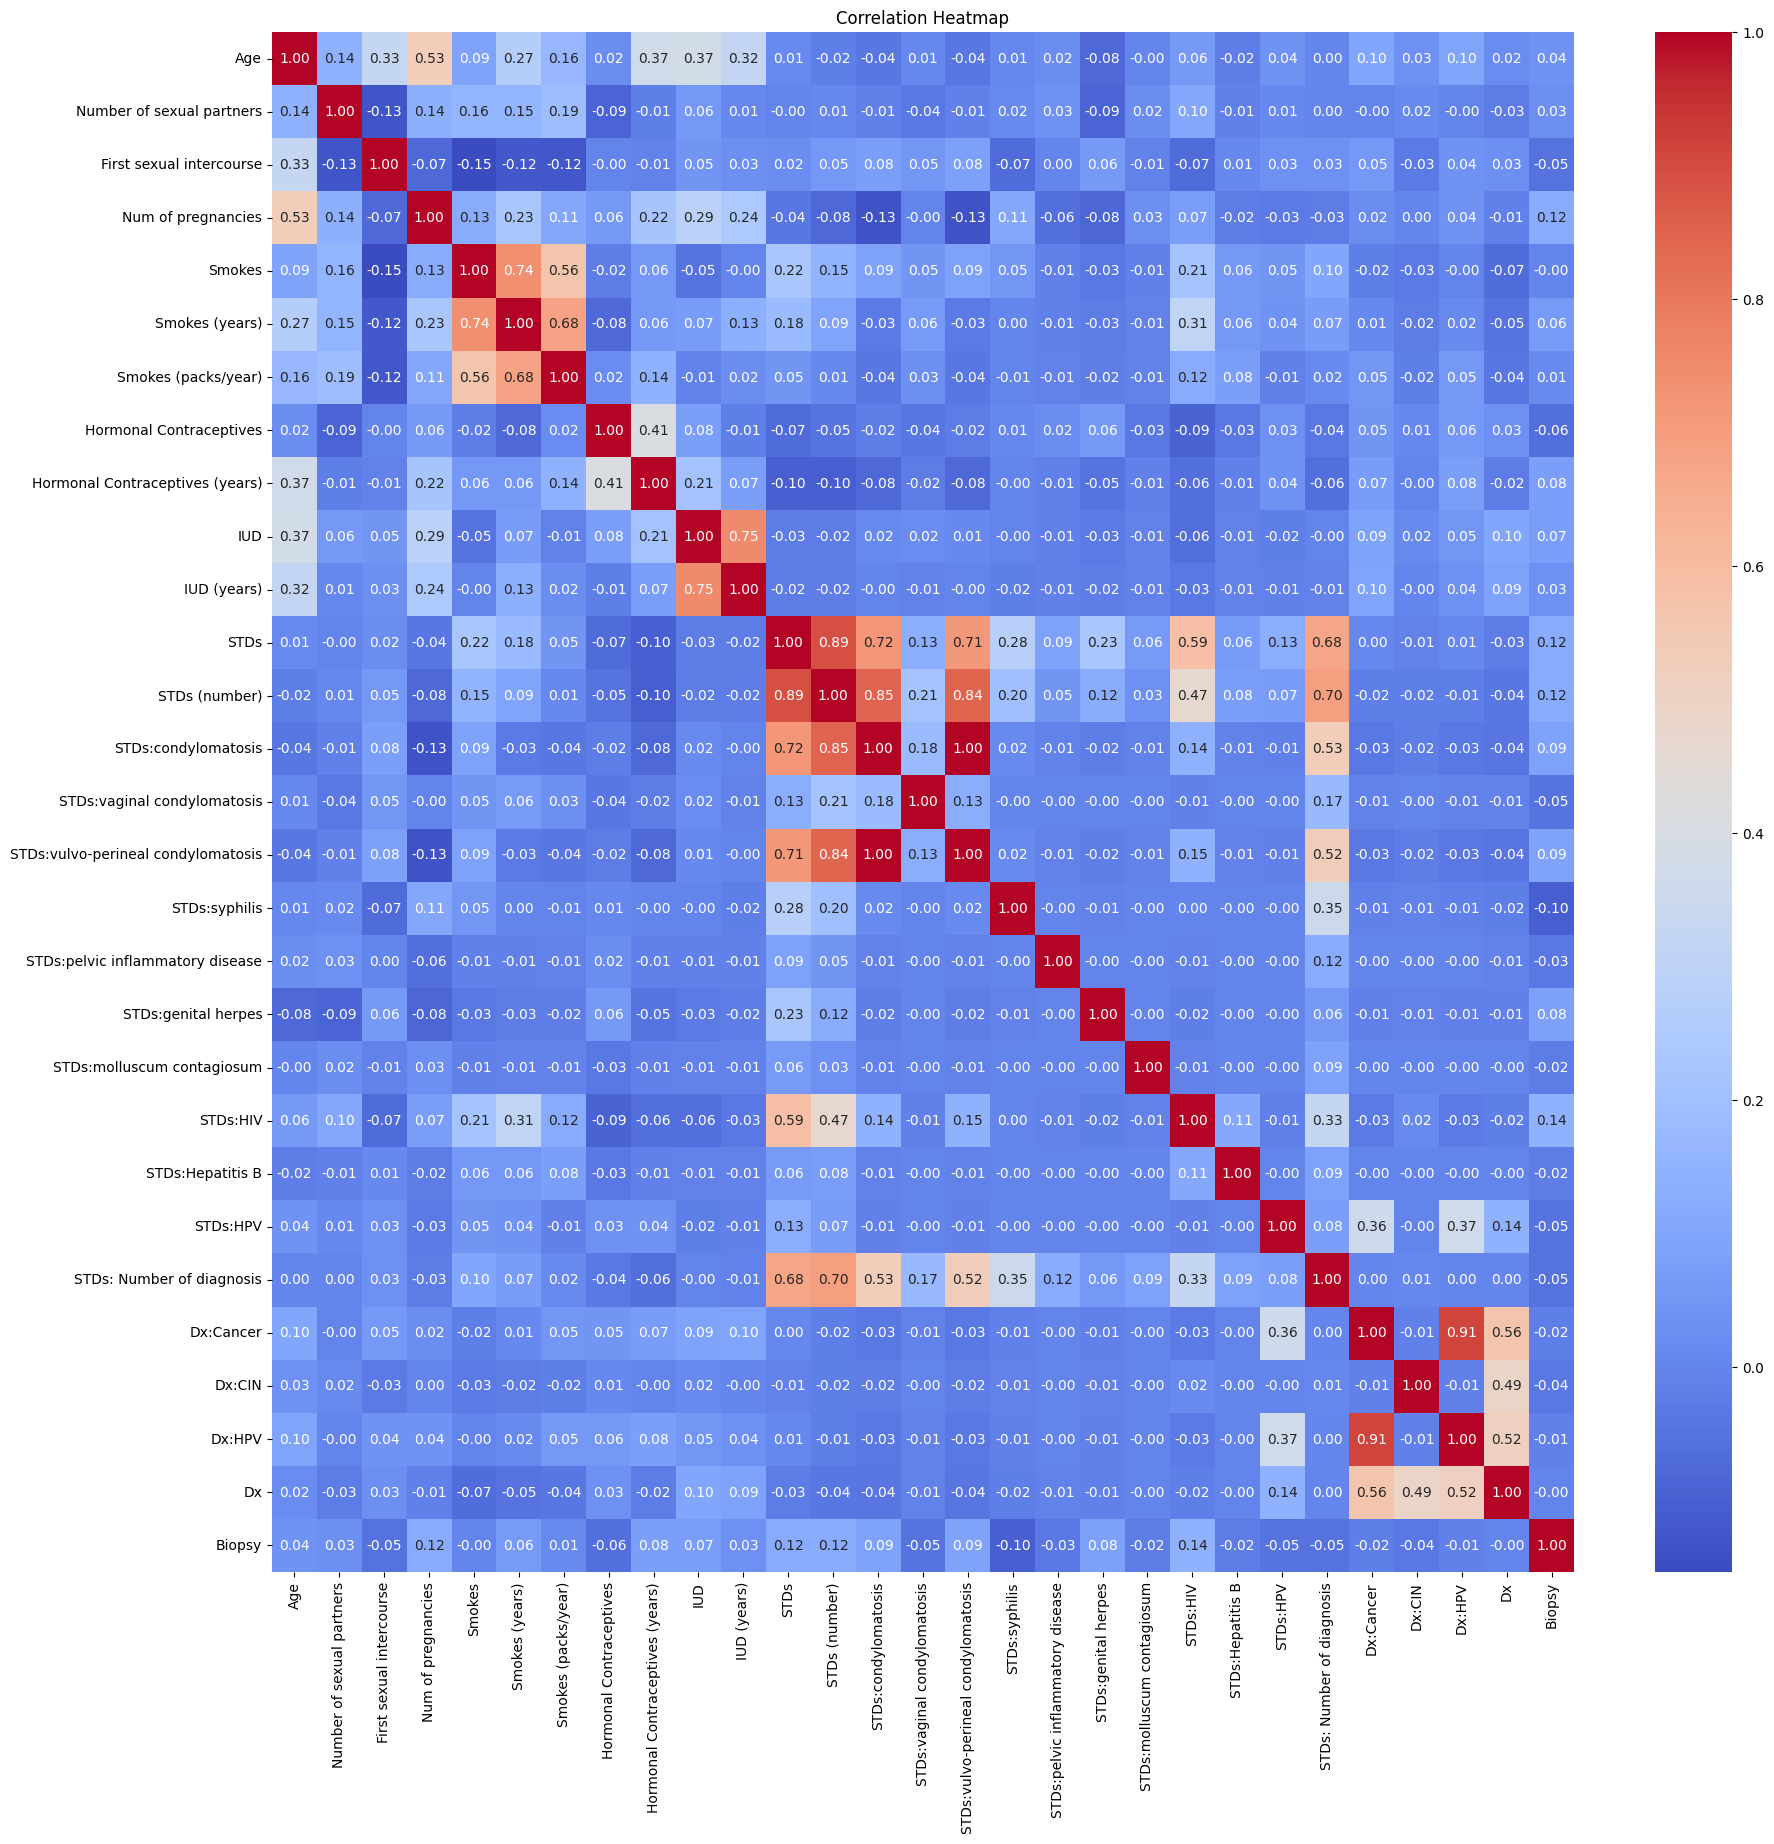

In [301]:
columns_to_analyze=['Age', 'Number of sexual partners', 'First sexual intercourse',
                     'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                     'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                     'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                     'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                     'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                     'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                     'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                     'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx','Biopsy']


subset_df = df[columns_to_analyze]


correlation_matrix = subset_df.corr()

plt.figure(figsize=(21,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


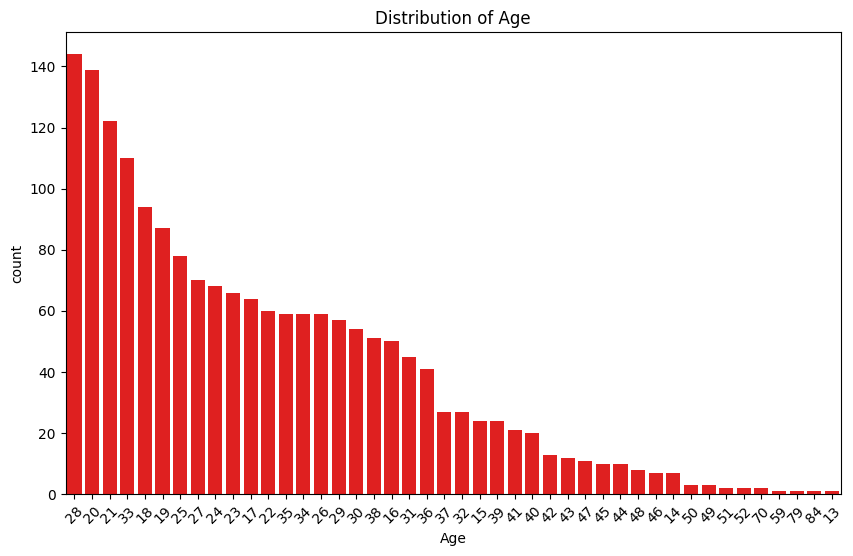

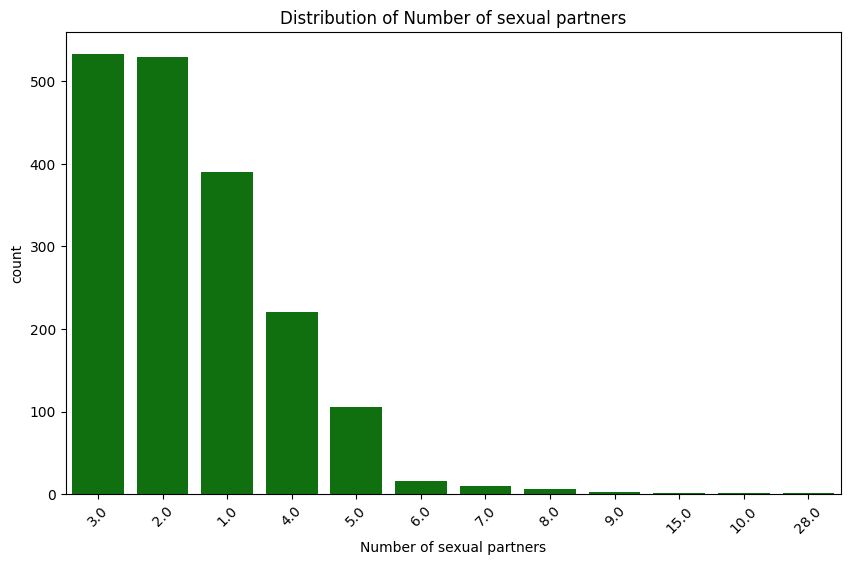

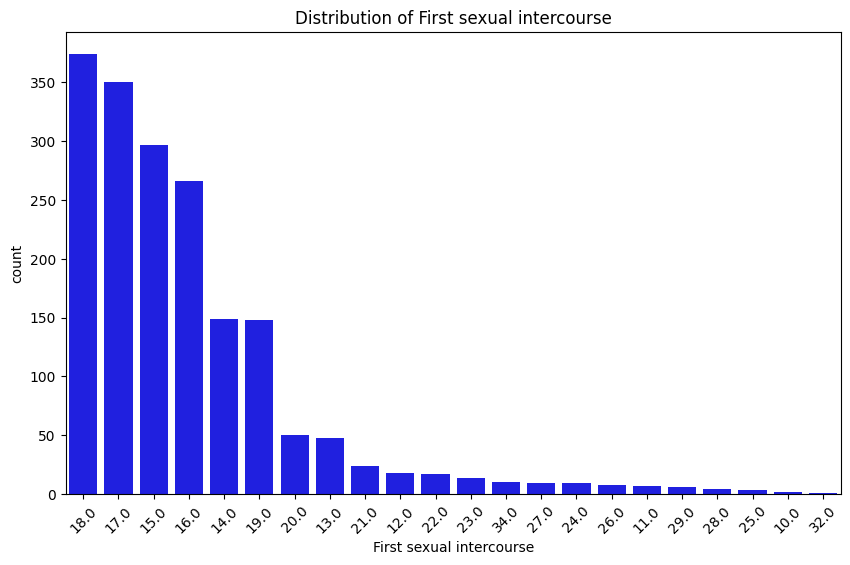

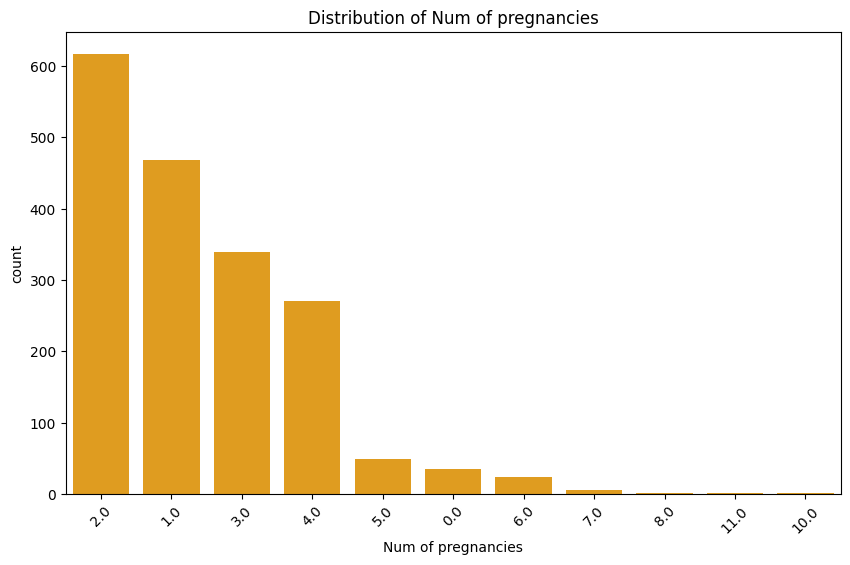

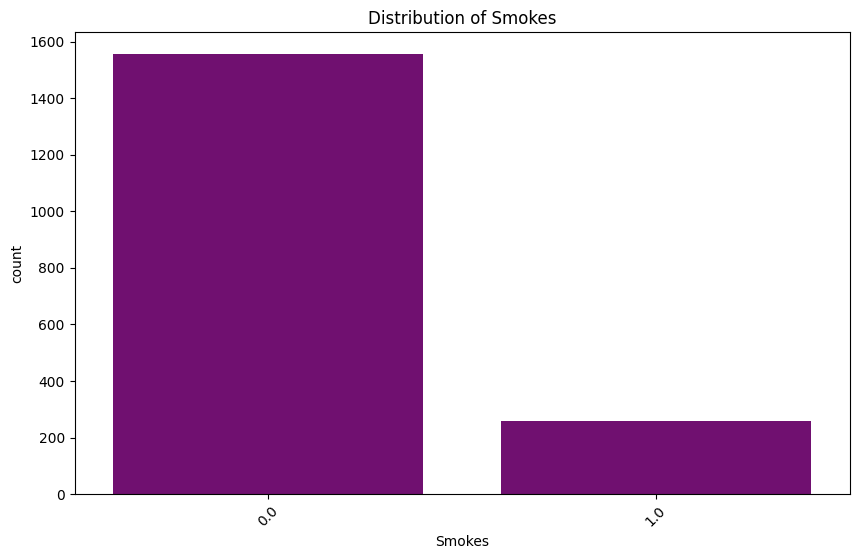

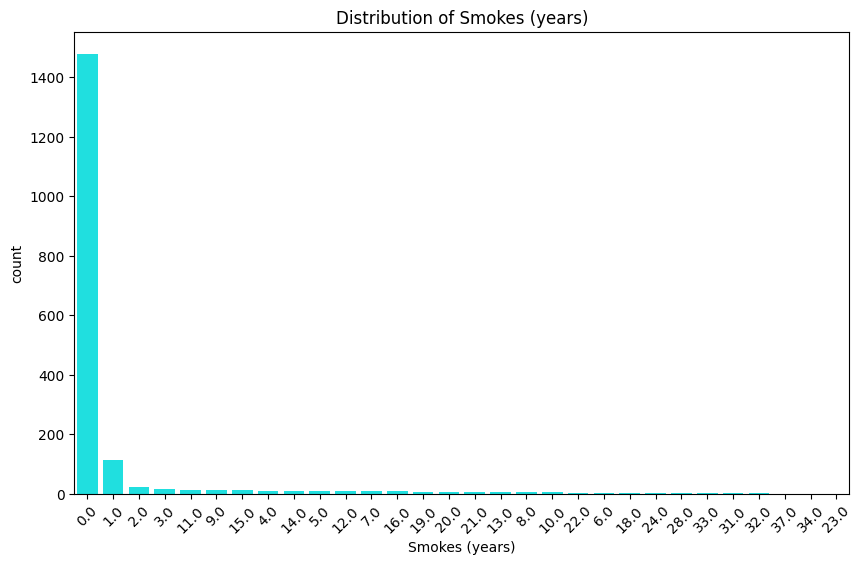

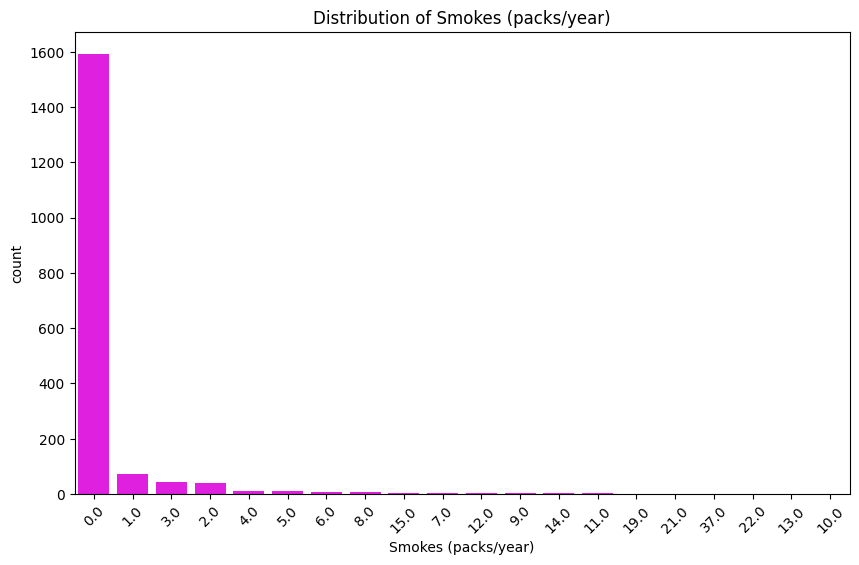

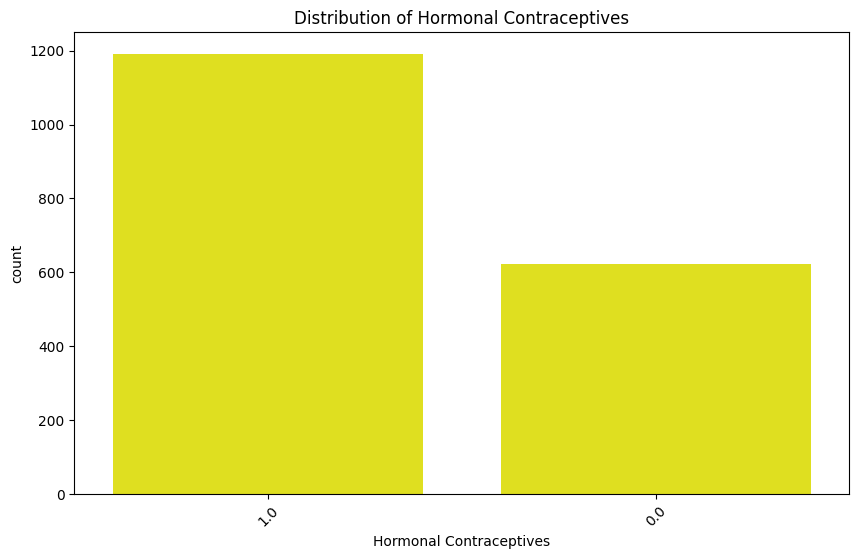

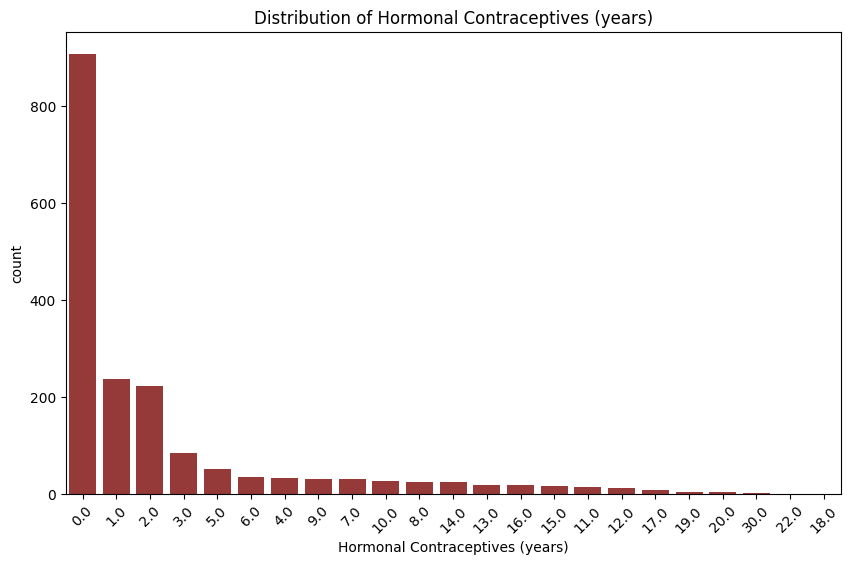

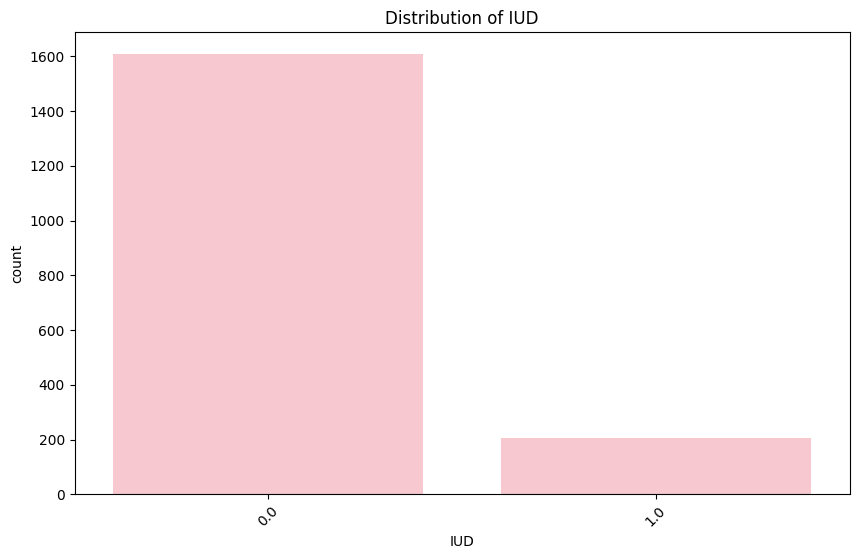

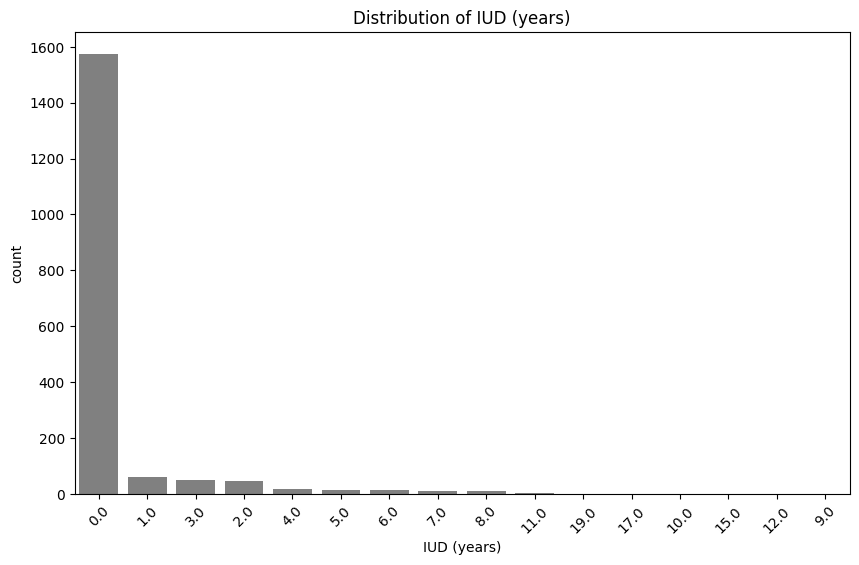

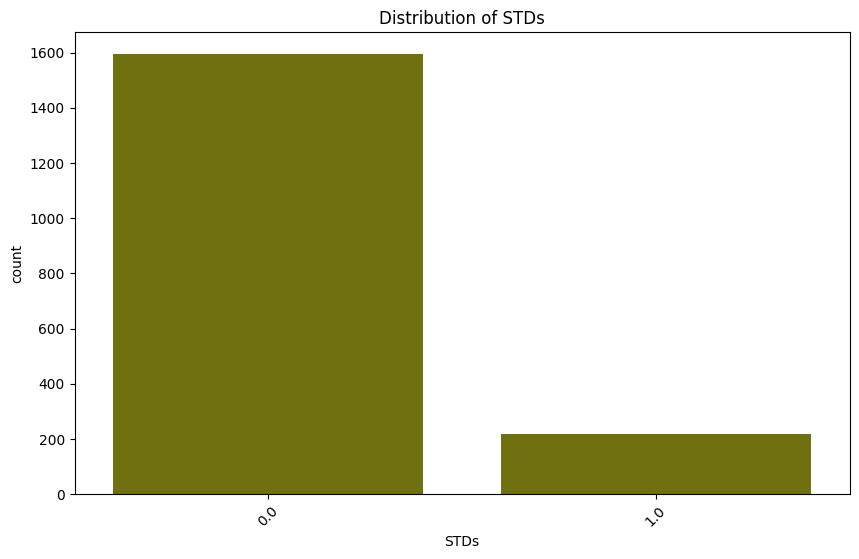

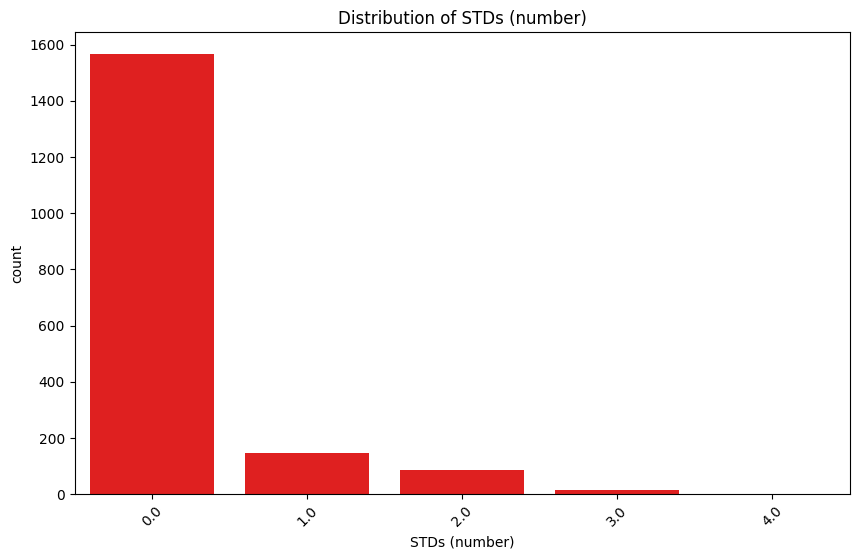

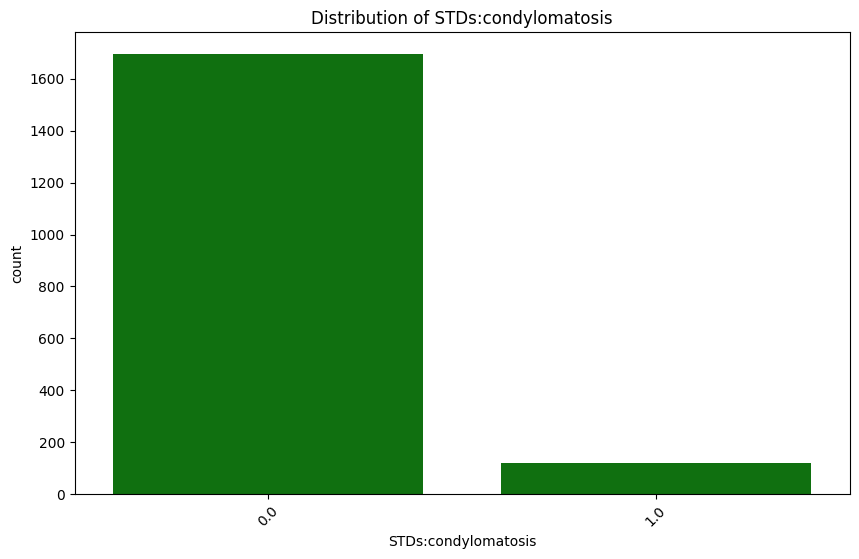

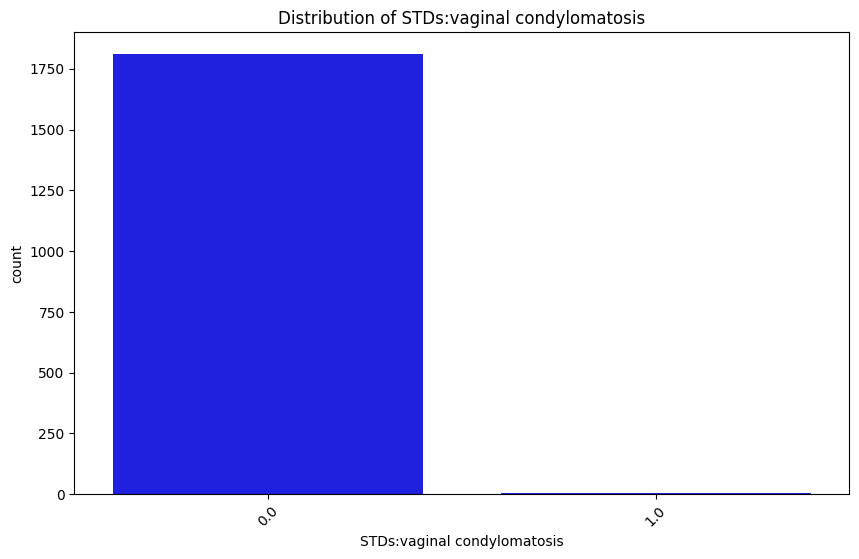

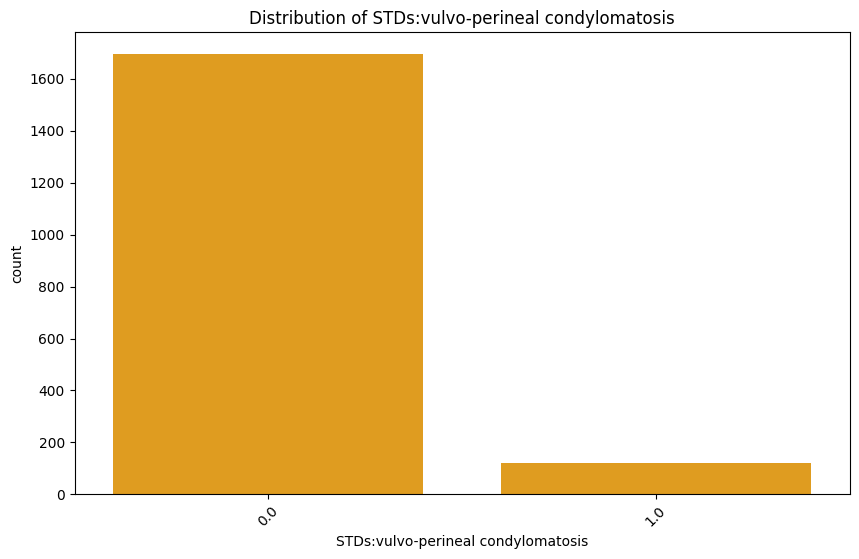

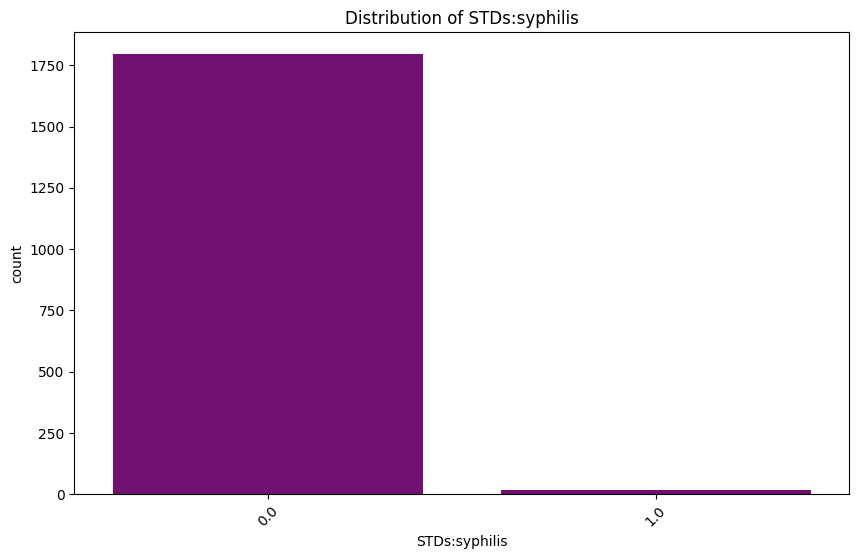

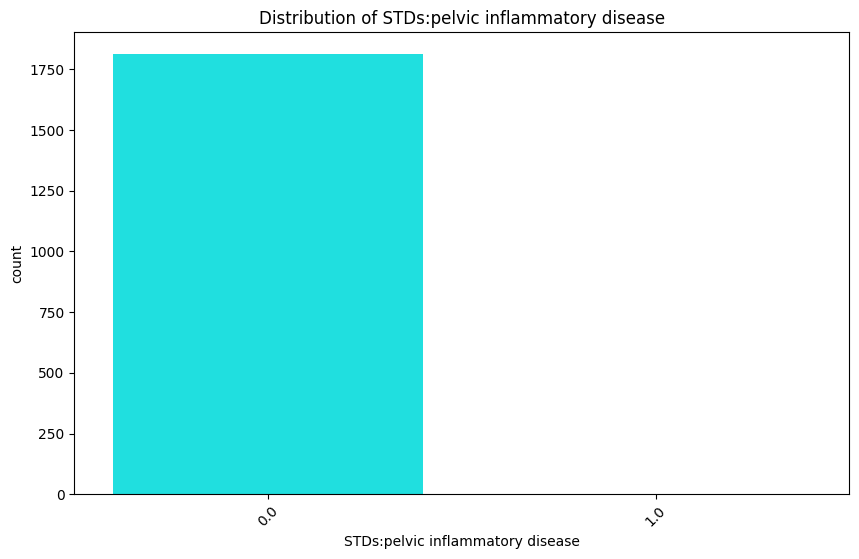

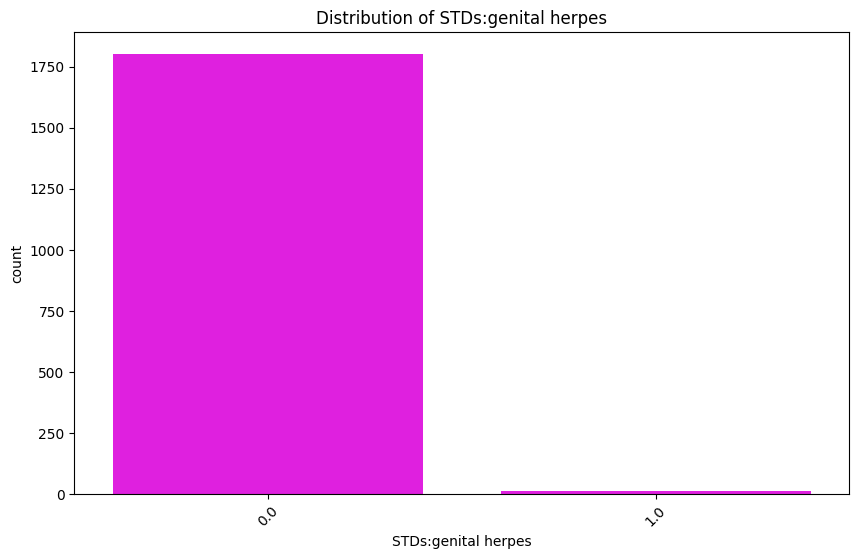

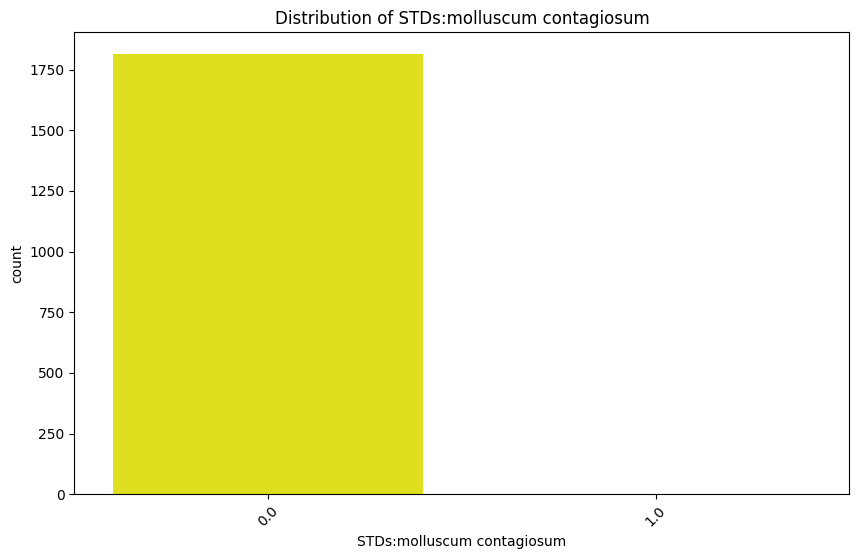

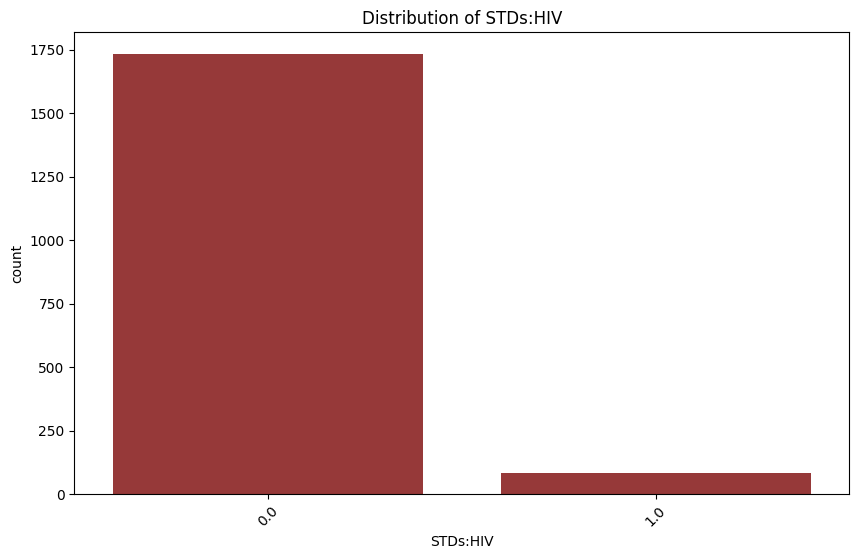

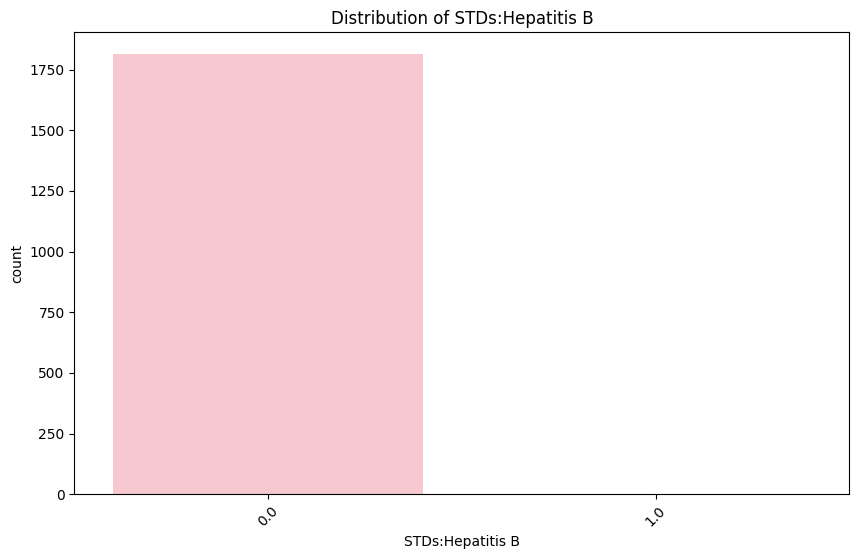

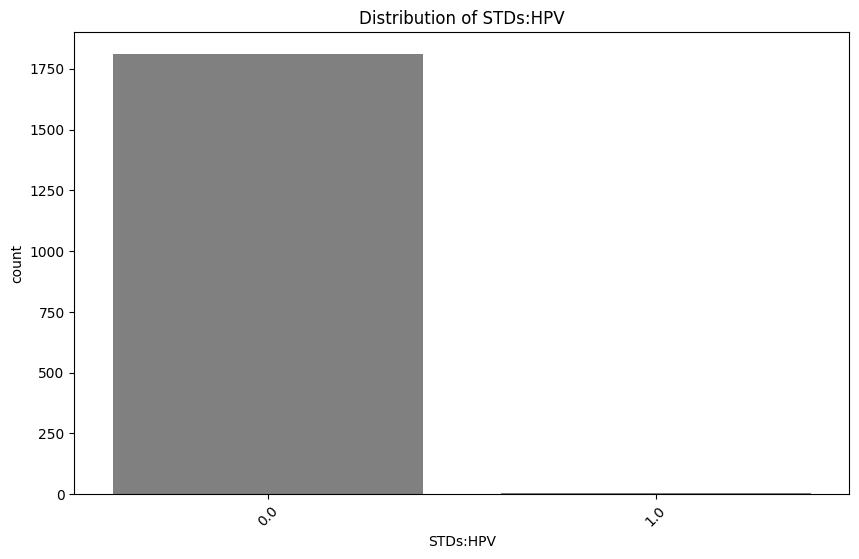

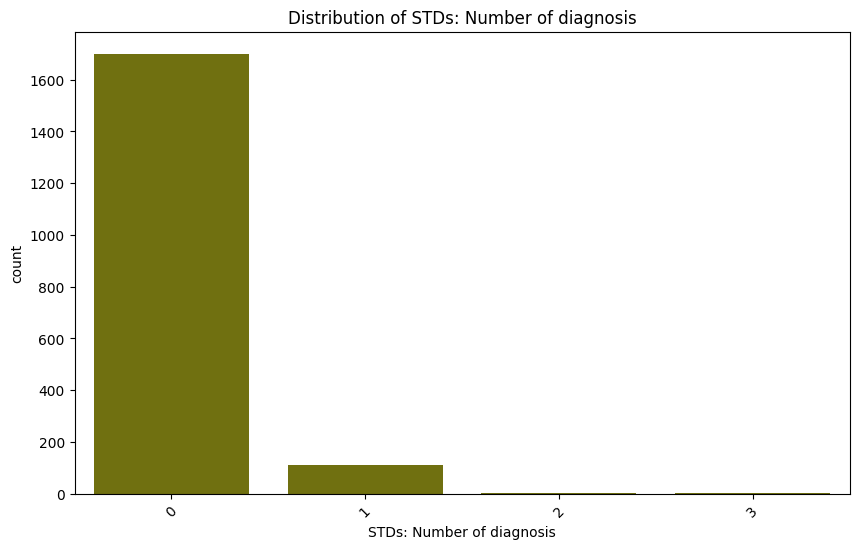

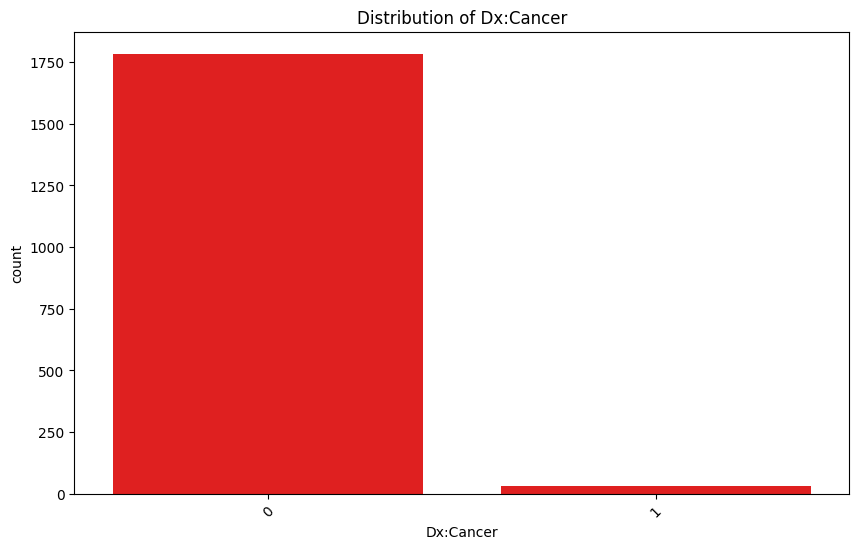

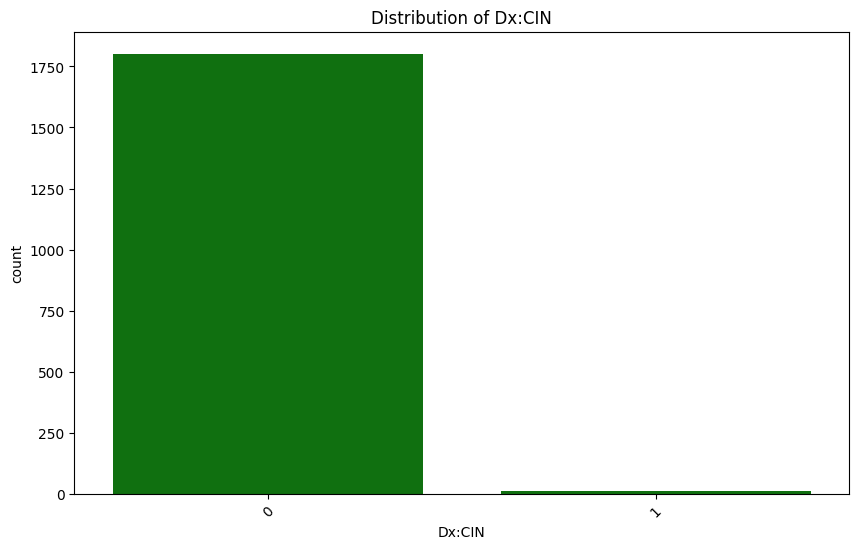

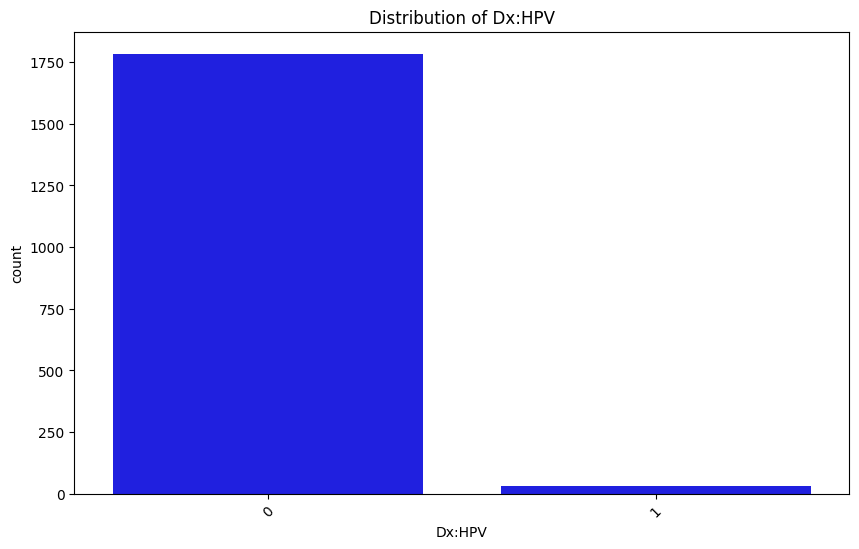

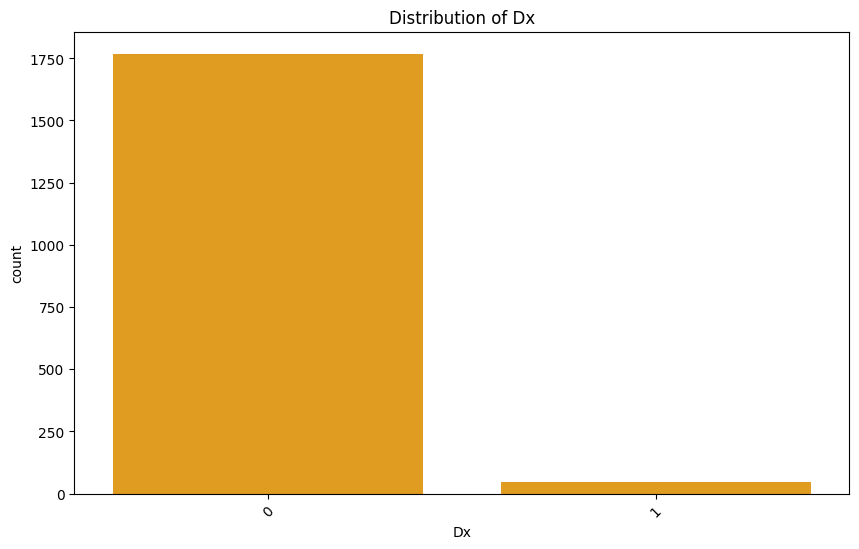

In [296]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive']

columns_to_analyze =['Age', 'Number of sexual partners', 'First sexual intercourse',
                     'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                     'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                     'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                     'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                     'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                     'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                     'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                     'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']

# Iterate over each column and plot the countplot
for i, col in enumerate(columns_to_analyze):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color=colors[i % len(colors)])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


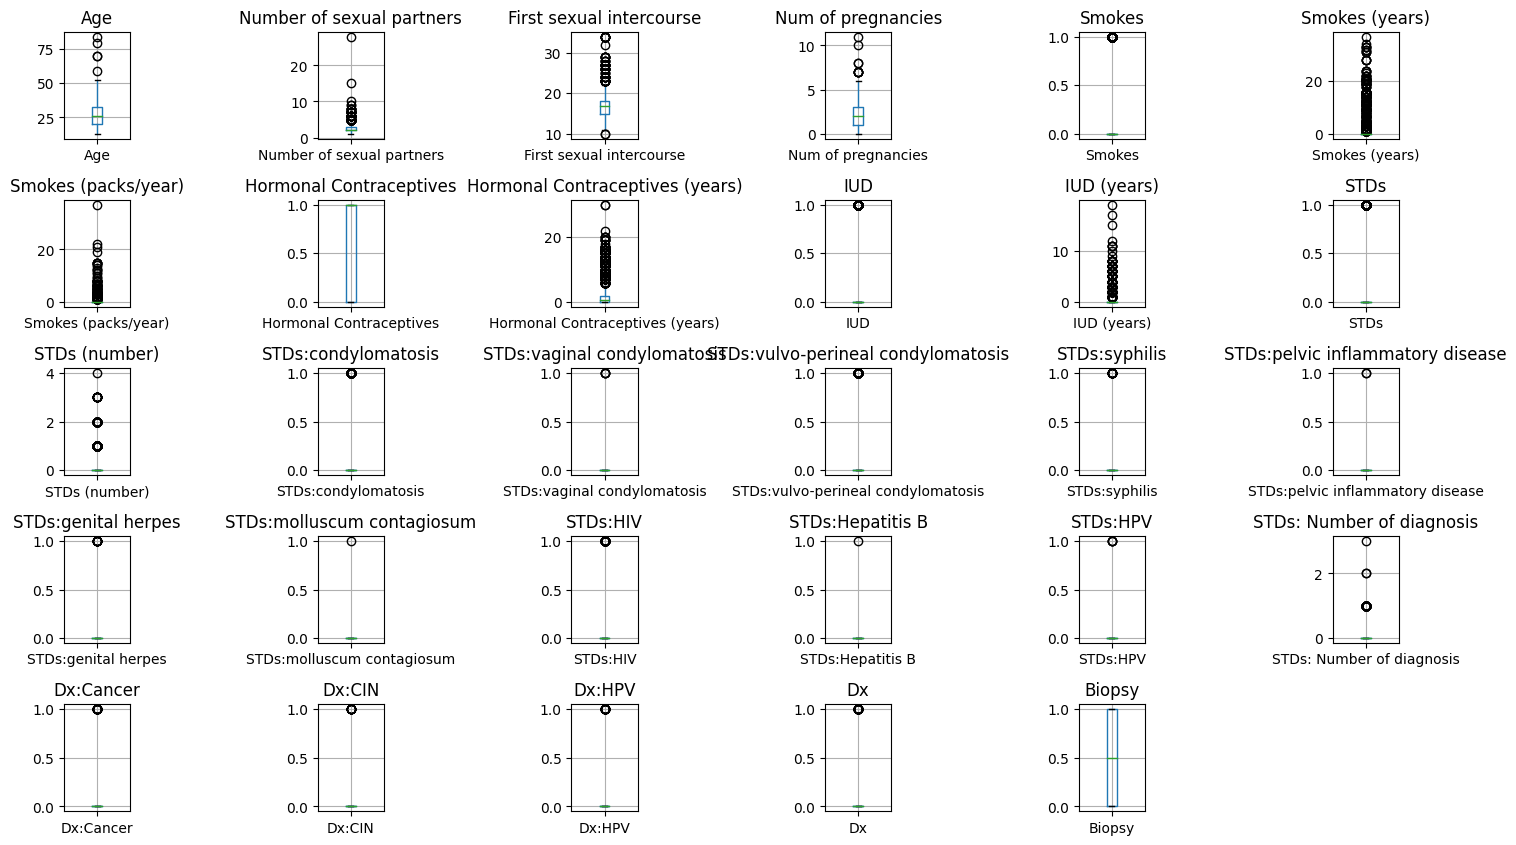

In [310]:
# List of columns for outlier analysis
columns_of_interest =['Age', 'Number of sexual partners', 'First sexual intercourse',
                                  'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                                  'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                                  'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                                  'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                                  'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                                  'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                                  'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                                  'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy']

# Plot boxplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(6, 6, i)
    df.boxplot(column)
    plt.title(column)

plt.subplots_adjust(hspace=1,wspace=3)
plt.tight_layout()
plt.show()


In [61]:
X=df.drop(columns='Biopsy')
y=df['Biopsy']

TRAIN TEST SPLIT

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=42)
log_model.fit(X_train,y_train)
log_y_pred=log_model.predict(X_test)


In [65]:
from sklearn.metrics import accuracy_score
log_accuracy=accuracy_score(log_y_pred,y_test)
print('Logistic Regression Accuracy: ',log_accuracy)
log_class=classification_report(log_y_pred,y_test)
print("Classification Report: ")
print(log_class)



Logistic Regression Accuracy:  0.6556473829201102
Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       212
           1       0.57      0.66      0.62       151

    accuracy                           0.66       363
   macro avg       0.65      0.66      0.65       363
weighted avg       0.67      0.66      0.66       363



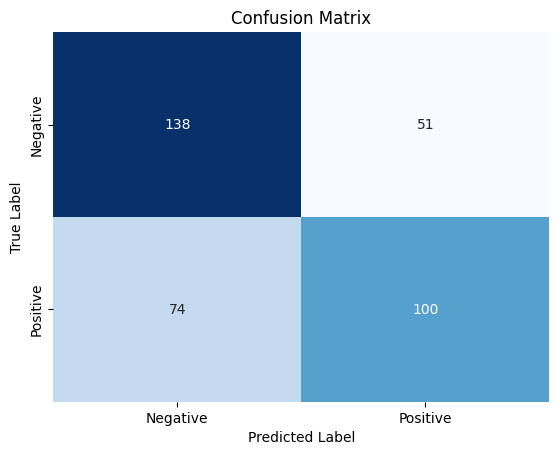

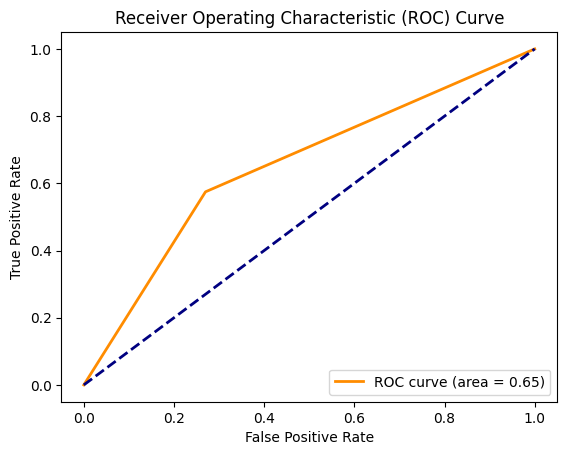

In [97]:
cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.show()
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
dtree_y_pred=dtree.predict(X_test)

# Calculate accuracy
dtree_accuracy = accuracy_score(dtree_y_pred, y_test)

print('Decision Tree Accuracy:', dtree_accuracy)

dt_class=classification_report(dtree_y_pred,y_test)
print("Classification Report: ")
print(dt_class)

Decision Tree Accuracy: 0.8925619834710744
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       160
           1       0.97      0.83      0.90       203

    accuracy                           0.89       363
   macro avg       0.90      0.90      0.89       363
weighted avg       0.90      0.89      0.89       363



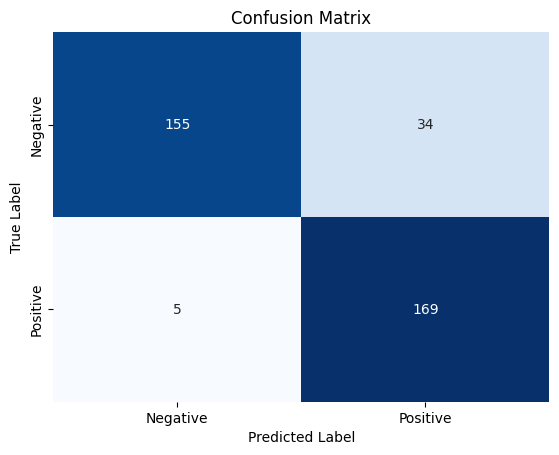

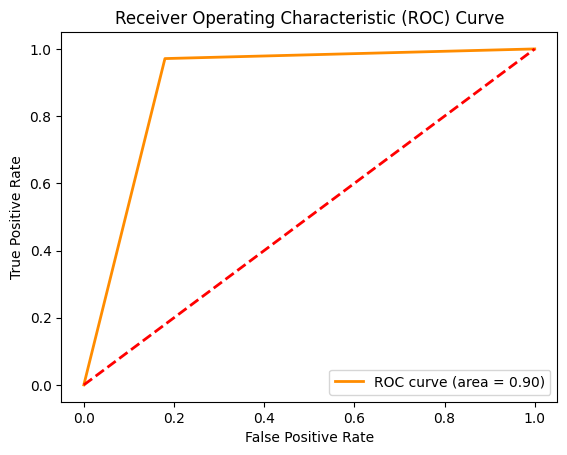

In [96]:

cm = confusion_matrix(y_test, dtree_y_pred)



sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, dtree_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(rf_y_pred, y_test)

print('Random Forest Accuracy:', rf_accuracy)
rf_class=classification_report(rf_y_pred,y_test)
print("Classification Report: ")
print(rf_class)

Random Forest Accuracy: 0.9338842975206612
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       173
           1       0.98      0.89      0.93       190

    accuracy                           0.93       363
   macro avg       0.94      0.94      0.93       363
weighted avg       0.94      0.93      0.93       363



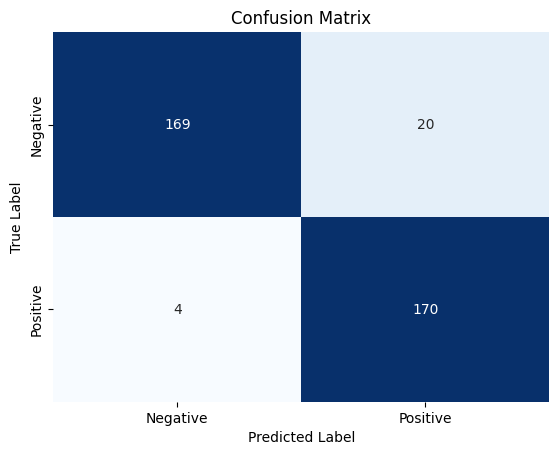

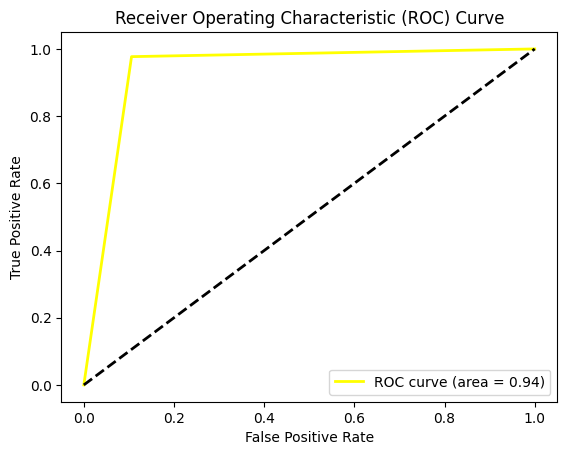

In [74]:
cm=confusion_matrix(y_test,rf_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)

knn_accuracy = accuracy_score(knn_y_pred, y_test)

print('KNN Accuracy:', knn_accuracy)
knn_class=classification_report(knn_y_pred,y_test)
print("Classification Report: ")
print(knn_class)


KNN Accuracy: 0.8650137741046832
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       154
           1       0.96      0.80      0.87       209

    accuracy                           0.87       363
   macro avg       0.87      0.88      0.86       363
weighted avg       0.88      0.87      0.87       363



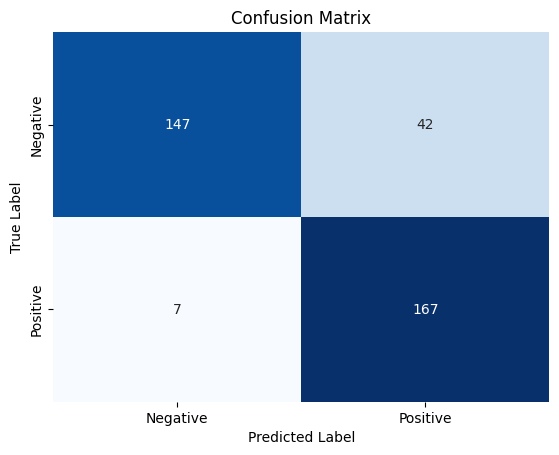

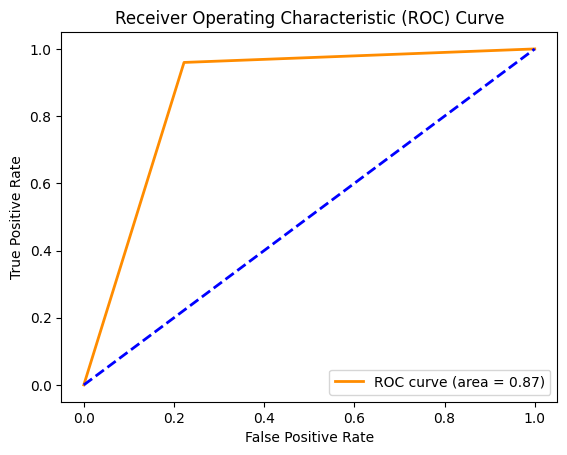

In [76]:
cm=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM

In [79]:
from sklearn.svm import SVC
svc_class=SVC(kernel='linear',random_state=42)

svc_class.fit(X_train,y_train)
svc_y_pred=svc_class.predict(X_test)

svc_accuracy = accuracy_score(svc_y_pred, y_test)

print('SVM Accuracy:', svc_accuracy)
svc_class=classification_report(svc_y_pred,y_test)
print("Classification Report: ")
print(svc_class)

SVM Accuracy: 0.6418732782369146
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.63      0.69       235
           1       0.49      0.67      0.57       128

    accuracy                           0.64       363
   macro avg       0.64      0.65      0.63       363
weighted avg       0.68      0.64      0.65       363



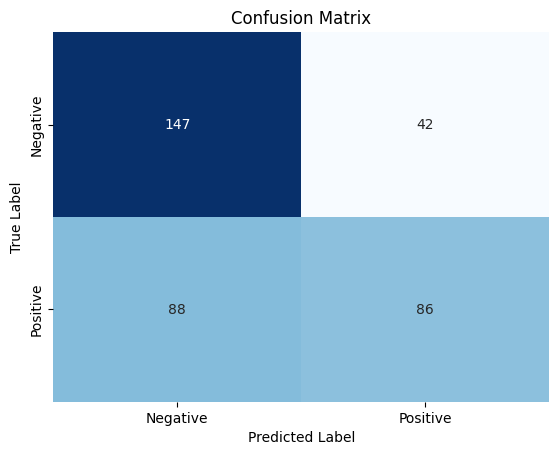

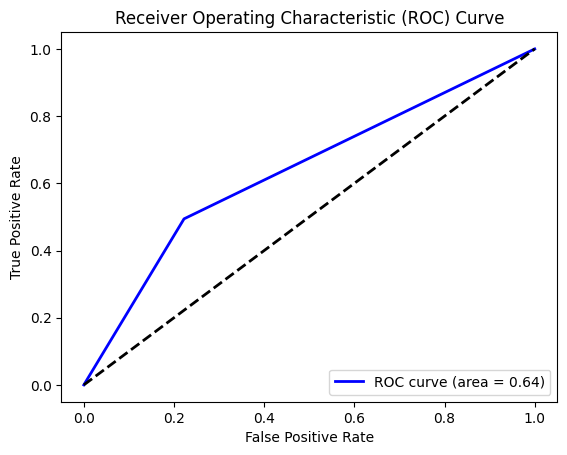

In [81]:
cm=confusion_matrix(y_test,svc_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, svc_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGB MODEL

In [82]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(objective='binary:logistic',random_state=42)

xgb_model.fit(X_train,y_train)
xgb_y_pred=xgb_model.predict(X_test)

xgb_acc=accuracy_score(y_test,xgb_y_pred)
print("XGB Accuracy: ",xgb_acc)
xgb_class=classification_report(xgb_y_pred,y_test)
print("Classification Report: ")
print(xgb_class)

XGB Accuracy:  0.9035812672176309
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       164
           1       0.97      0.85      0.91       199

    accuracy                           0.90       363
   macro avg       0.91      0.91      0.90       363
weighted avg       0.91      0.90      0.90       363



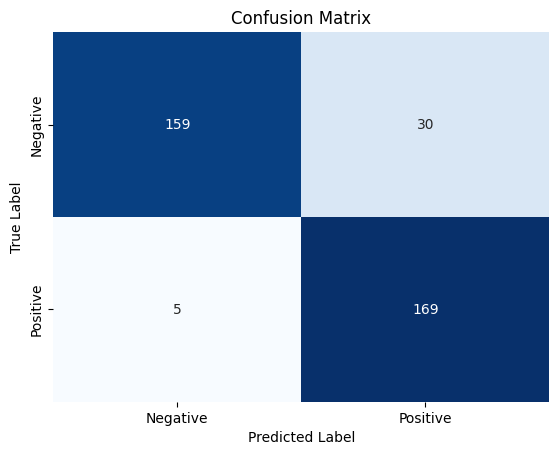

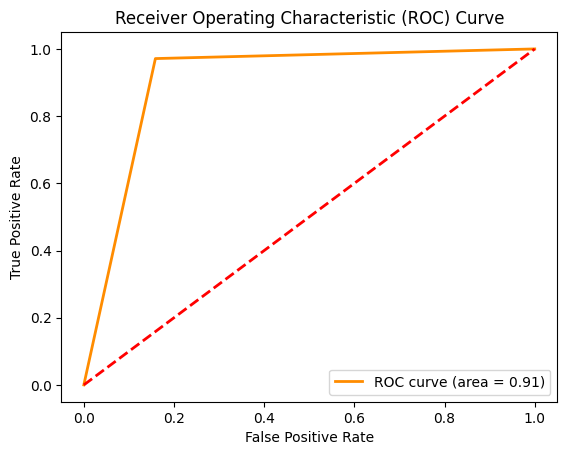

In [83]:
cm=confusion_matrix(y_test,xgb_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Extra Tree Classifier

In [84]:
from sklearn.ensemble  import ExtraTreesClassifier
etree_model=ExtraTreesClassifier(random_state=42)
etree_model.fit(X_train,y_train)
etree_y_pred=etree_model.predict(X_test)

etree_acc=accuracy_score(y_test,etree_y_pred)
print("Extra Tree Classifier Accuracy: ",etree_acc)

etree_class=classification_report(etree_y_pred,y_test)
print("Classification Report: ")
print(etree_class)

Extra Tree Classifier Accuracy:  0.9366391184573003
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       178
           1       0.97      0.91      0.94       185

    accuracy                           0.94       363
   macro avg       0.94      0.94      0.94       363
weighted avg       0.94      0.94      0.94       363



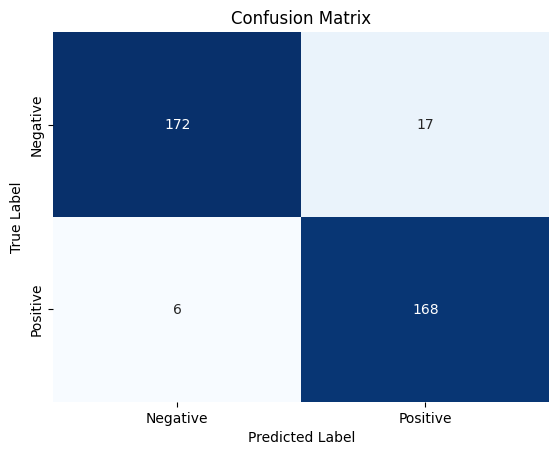

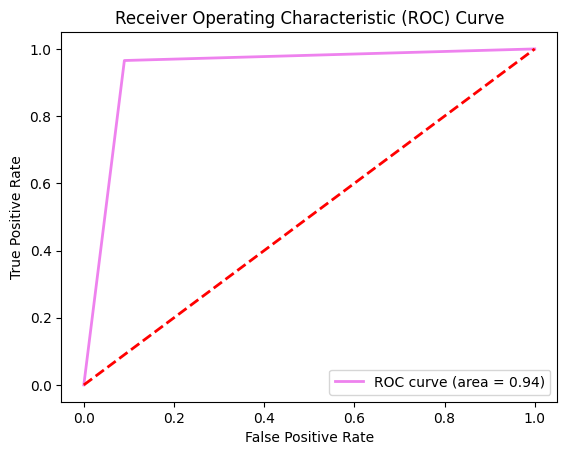

In [85]:
cm=confusion_matrix(y_test,etree_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, etree_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='violet', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Ada Boost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost=AdaBoostClassifier(random_state=42)
ada_boost.fit(X_train,y_train)
ada_boost_y_pred=ada_boost.predict(X_test)


ada_boost_acc=accuracy_score(y_test,ada_boost_y_pred)
print('Ada Boost Accuracy: ',ada_boost_acc)

ada_boost_class=classification_report(ada_boost_y_pred,y_test)
print("Classification Report: ")
print(ada_boost_class)

Ada Boost Accuracy:  0.743801652892562
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       164
           1       0.80      0.70      0.75       199

    accuracy                           0.74       363
   macro avg       0.75      0.75      0.74       363
weighted avg       0.75      0.74      0.74       363



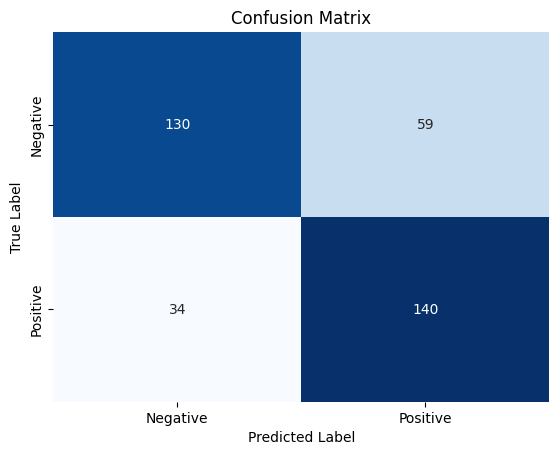

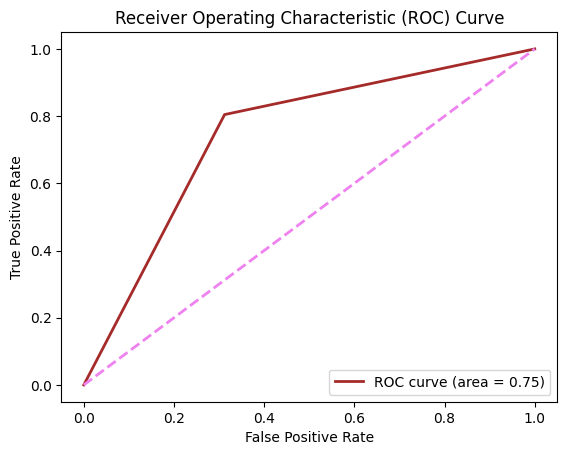

In [112]:
cm=confusion_matrix(y_test,ada_boost_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, ada_boost_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cat Boost

In [88]:
!pip install catboost --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.7 MB/s eta 0:00:00


In [89]:
from catboost import CatBoostClassifier
catboost_model=CatBoostClassifier(random_state=42)
catboost_model.fit(X_train,y_train,verbose=False)
catboost_y_pred=catboost_model.predict(X_test)

catboost_acc= accuracy_score(y_test,catboost_y_pred)
print(" Catboost Accuracy:  ",catboost_acc)

catboost_class=classification_report(catboost_y_pred,y_test)
print("Classification Report: ")
print(catboost_class)

 Catboost Accuracy:   0.8898071625344353
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       175
           1       0.93      0.86      0.89       188

    accuracy                           0.89       363
   macro avg       0.89      0.89      0.89       363
weighted avg       0.89      0.89      0.89       363



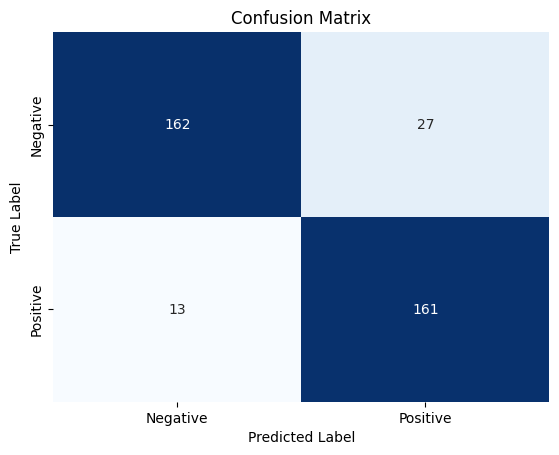

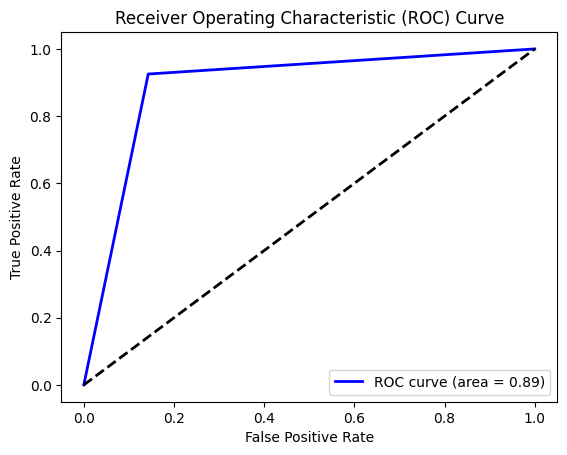

In [90]:
cm=confusion_matrix(y_test,catboost_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, catboost_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

GradientBoost

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train,y_train)
gbc_model_pred=gbc_model.predict(X_test)

gbc_acc=accuracy_score(y_test,gbc_model_pred)
gbc_class=classification_report(y_test,gbc_model_pred)

print("GradientBoost Accuracy: ",gbc_acc)
print("Classification Report: ")
print(gbc_class)

GradientBoost Accuracy:  0.8319559228650137
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       189
           1       0.78      0.91      0.84       174

    accuracy                           0.83       363
   macro avg       0.84      0.83      0.83       363
weighted avg       0.84      0.83      0.83       363



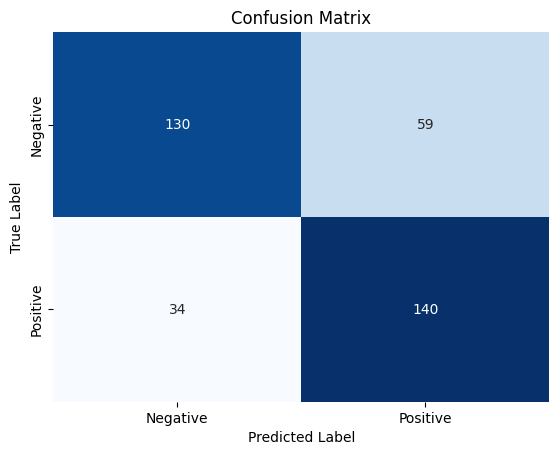

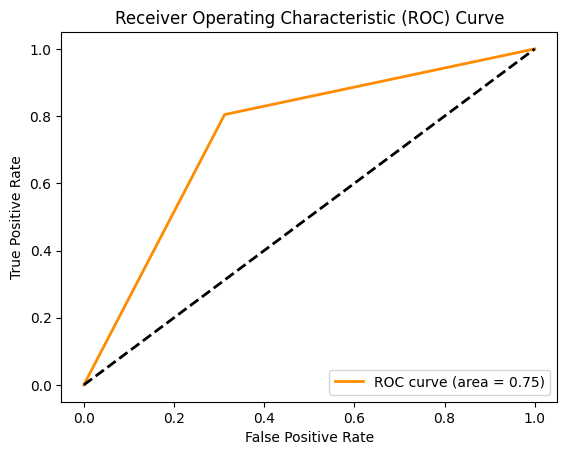

In [92]:
cm=confusion_matrix(y_test,ada_boost_y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, ada_boost_y_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

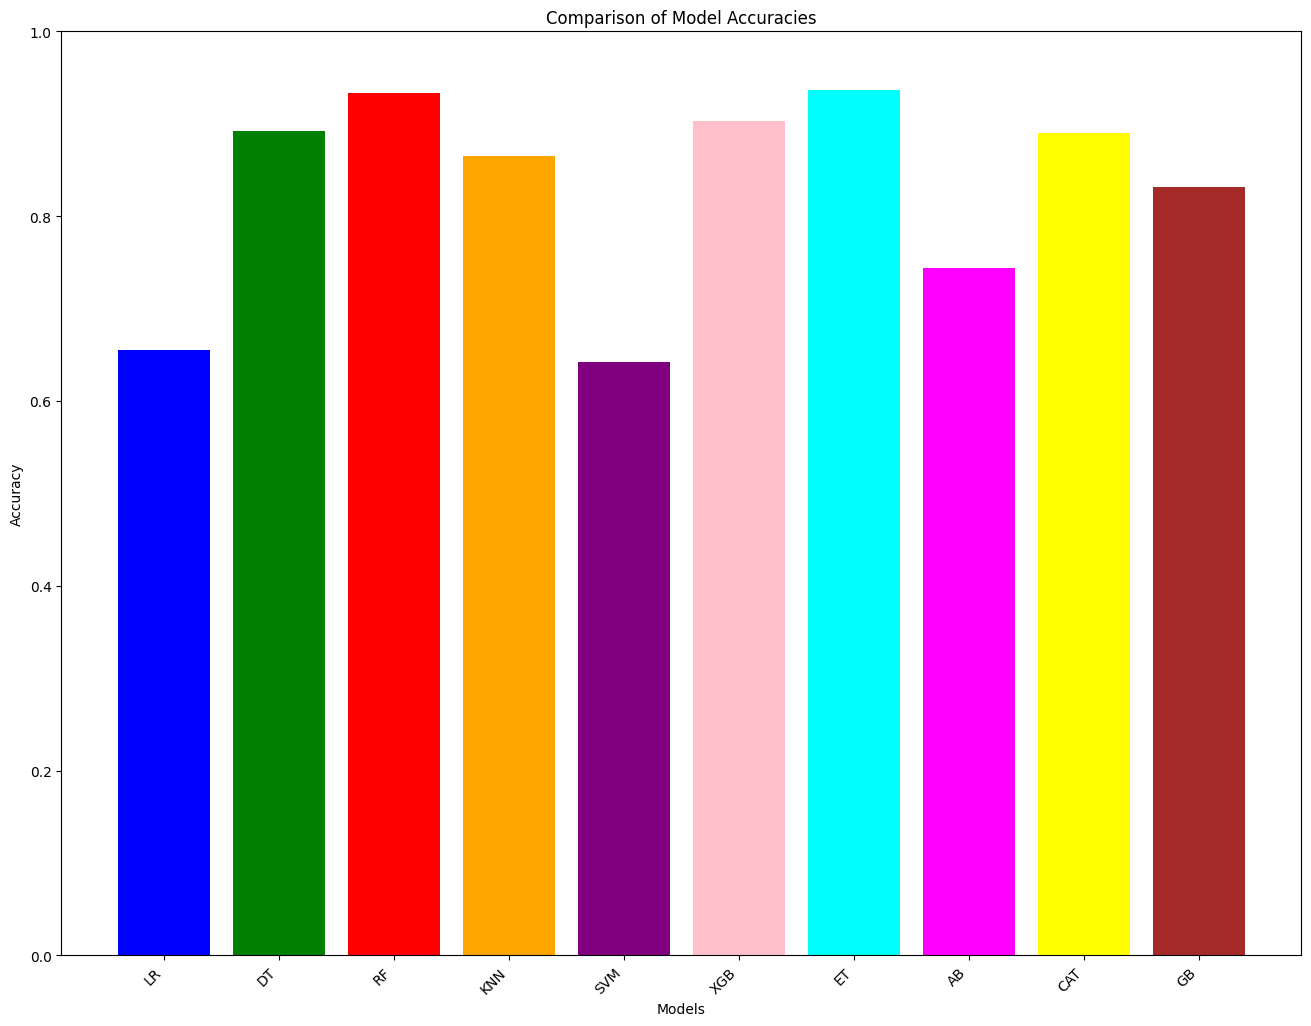

In [111]:
models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'ET','AB', 'CAT', 'GB']
accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy,svc_accuracy,xgb_acc,etree_acc,ada_boost_acc,catboost_acc,gbc_acc]

# Plotting the bar plot
plt.figure(figsize=(16, 12))
plt.bar(models, accuracies,color=['blue', 'green', 'red', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

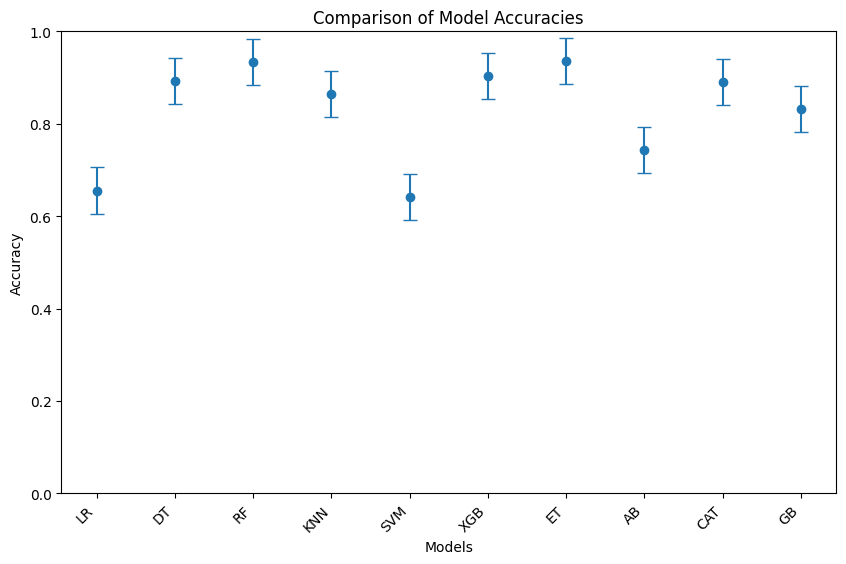

In [254]:
models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'ET','AB', 'CAT', 'GB']
accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy,svc_accuracy,xgb_acc,etree_acc,ada_boost_acc,catboost_acc,gbc_acc]

plt.figure(figsize=(10, 6))
plt.errorbar(models, accuracies, yerr=0.05, fmt='o', capsize=5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()


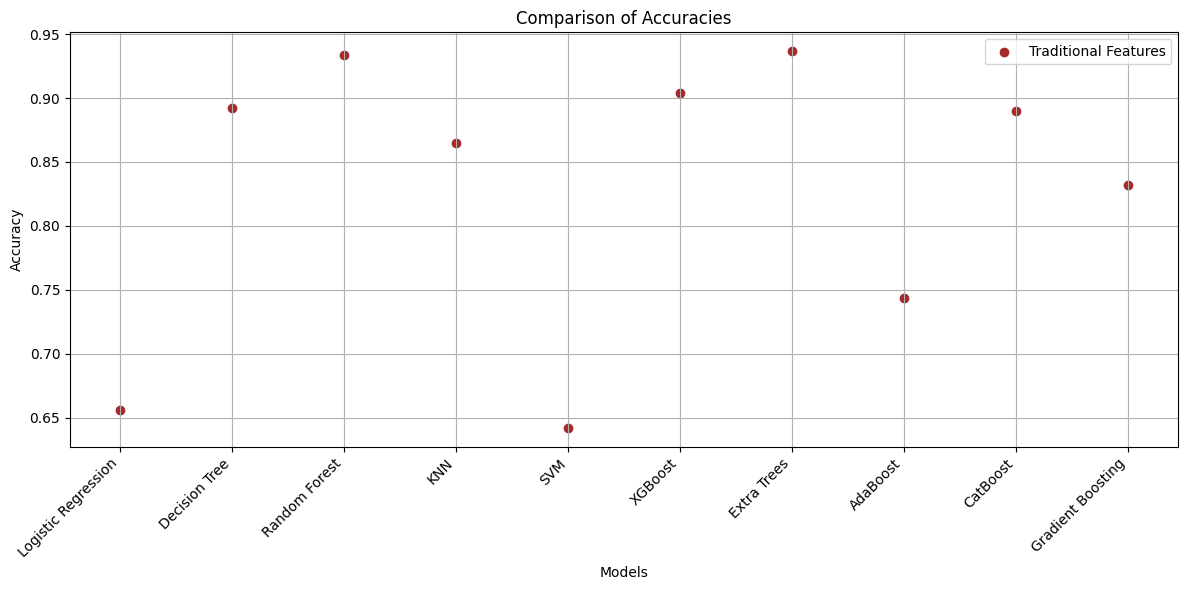

In [275]:
# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Extra Trees', 'AdaBoost', 'CatBoost', 'Gradient Boosting']
traditional_accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy, svc_accuracy, xgb_acc, etree_acc, ada_boost_acc, catboost_acc, gbc_acc]

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(models, traditional_accuracies, marker='o', color='brown', label='Traditional Features')


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


CONVOLUTED FEATURES USING CNN

In [145]:
'''import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Assuming df is your DataFrame with numerical data
# Assuming 'target_column' is the name of the column containing your target values

# Extract features and labels from DataFrame
X = df.drop(columns=['Biopsy']).to_numpy()  # Features
y = df['Biopsy'].to_numpy()  # Labels

# Reshape features
num_samples, num_features = X.shape
X_reshaped = X.reshape(num_samples, num_features, 1)  # Add a channel dimension

# Normalize features
X_normalized = (X_reshaped - np.mean(X_reshaped)) / np.std(X_reshaped)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Build CNN model for feature extraction
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_features, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dense(1)  # Adjust output layer according to your task
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Adjust loss function and optimizer as needed

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust batch size and number of epochs

# Extract features using intermediate layers
feature_extraction_model = Sequential(model.layers[:-1])  # Remove the output layer
train_features = feature_extraction_model.predict(X_train)
test_features = feature_extraction_model.predict(X_test)

# Train and evaluate your machine learning model using the extracted features'''


Epoch 1/100
46/46 [==============================] - 2s 6ms/step - loss: 0.2885
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2545
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2508
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2323
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2222
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2176
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2099
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2006
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 0.1968
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 0.1873
Epoch 11/100
46/46 [==============================] - 0s 6ms/step - loss: 0.1882
Epoch 12/100
46/46 [==============================] - 0s 6ms/step - loss: 0.1767
Epoch 13/100
46/46 [=================

In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU

# Assuming df is your DataFrame with numerical data
# Assuming 'target_column' is the name of the column containing your target values

# Extract features and labels from DataFrame
X = df.drop(columns=['Biopsy']).to_numpy()  # Features
y = df['Biopsy'].to_numpy()  # Labels

# Reshape features
num_samples, num_features = X.shape
X_reshaped = X.reshape(num_samples, num_features, 1)  # Add a channel dimension

# Normalize features
X_normalized = (X_reshaped - np.mean(X_reshaped)) / np.std(X_reshaped)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Build CNN model for feature extraction
model = Sequential([
    Conv1D(32, kernel_size=3, activation=None, input_shape=(num_features, 1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation=None),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation=None),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation=None),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),  # Adjusting dropout rate
    Dense(64, activation=None),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Adjust loss function and optimizer as needed

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32)  # Adjust batch size and number of epochs

# Extract features using intermediate layers
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output)  # Adjust output layer
train_features = feature_extraction_model.predict(X_train)
test_features = feature_extraction_model.predict(X_test)



Epoch 1/300
46/46 [==============================] - 3s 8ms/step - loss: 0.5051
Epoch 2/300
46/46 [==============================] - 0s 8ms/step - loss: 0.3775
Epoch 3/300
46/46 [==============================] - 0s 8ms/step - loss: 0.3505
Epoch 4/300
46/46 [==============================] - 0s 8ms/step - loss: 0.3236
Epoch 5/300
46/46 [==============================] - 0s 8ms/step - loss: 0.3115
Epoch 6/300
46/46 [==============================] - 0s 8ms/step - loss: 0.2819
Epoch 7/300
46/46 [==============================] - 0s 8ms/step - loss: 0.2429
Epoch 8/300
46/46 [==============================] - 0s 10ms/step - loss: 0.2313
Epoch 9/300
46/46 [==============================] - 1s 12ms/step - loss: 0.2101
Epoch 10/300
46/46 [==============================] - 1s 12ms/step - loss: 0.2014
Epoch 11/300
46/46 [==============================] - 1s 13ms/step - loss: 0.1829
Epoch 12/300
46/46 [==============================] - 0s 10ms/step - loss: 0.1786
Epoch 13/300
46/46 [============

LOGISTIC REGRESSION

In [176]:
from sklearn.linear_model import LogisticRegression
con_log_model=LogisticRegression(random_state=42)
con_log_model.fit(train_features,y_train)

con_log_pred=con_log_model.predict(test_features)

convoluted_log_acc=accuracy_score(y_test,con_log_pred)
print("Logistic Regression Accuracy:", convoluted_log_acc)

convoluted_log_class=classification_report(y_test,con_log_pred)
print("Classification Report: ",convoluted_log_class)


Logistic Regression Accuracy: 0.9035812672176309
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.86      0.90       189
           1       0.86      0.95      0.90       174

    accuracy                           0.90       363
   macro avg       0.91      0.91      0.90       363
weighted avg       0.91      0.90      0.90       363



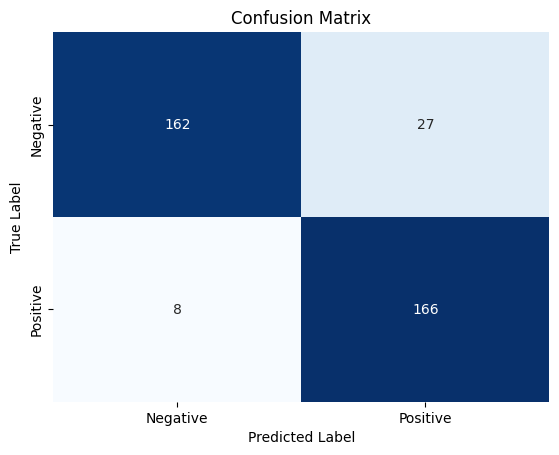

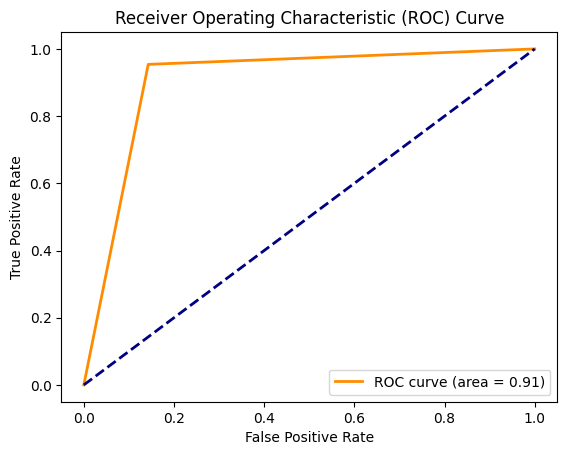

In [177]:
cm=confusion_matrix(y_test,con_log_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, con_log_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [178]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
convoluted_rf=RandomForestClassifier(random_state=42)
convoluted_rf.fit(train_features,y_train)
convoluted_rf_pred=convoluted_rf.predict(test_features)

convoluted_rf_acc=accuracy_score(y_test,convoluted_rf_pred)
print("Random Forest lassifier Accuracy:", convoluted_rf_acc)

convoluted_rf_class=classification_report(y_test,convoluted_rf_pred)
print("Classification Report: ",convoluted_rf_class)

Random Forest lassifier Accuracy: 0.9228650137741047
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



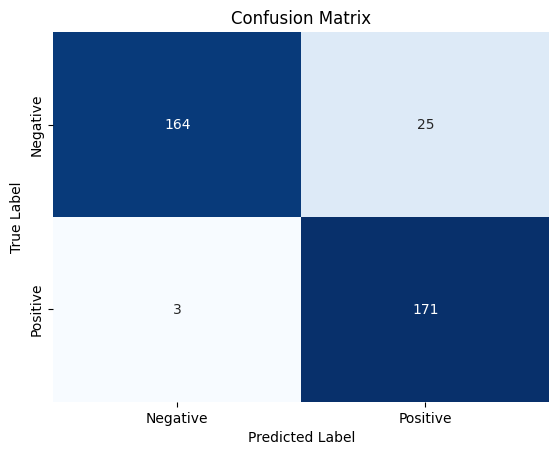

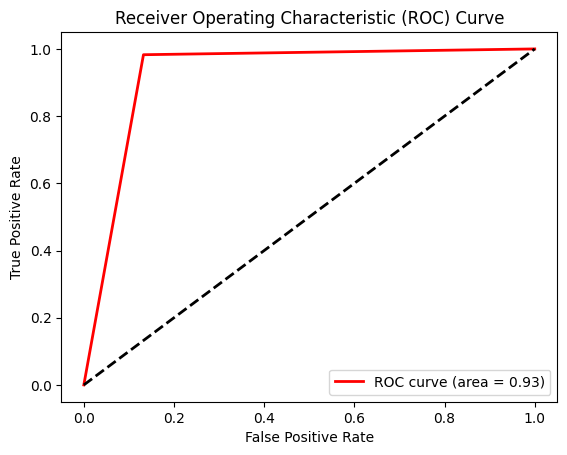

In [180]:
cm=confusion_matrix(y_test,convoluted_rf_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, convoluted_rf_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

DECISION TREE

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_features, y_train)

# Predict on the test set
con_y_pred_dt = dt_classifier.predict(test_features)

# Evaluate the Decision Tree classifier
accuracy_dt = accuracy_score(y_test, con_y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

convoluted_dt_class=classification_report(y_test,con_y_pred_dt)
print("Classification Report: ",convoluted_dt_class)


Decision Tree Classifier Accuracy: 0.9228650137741047
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.88      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



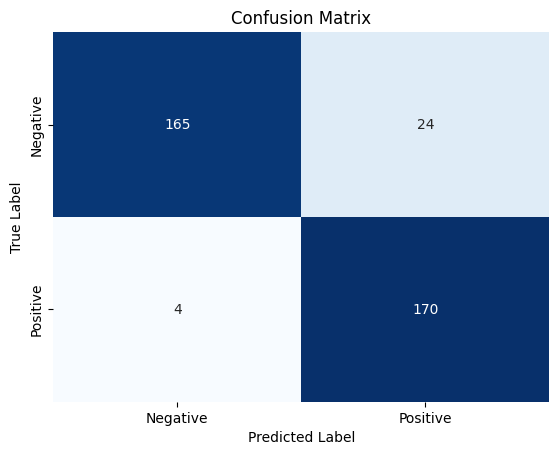

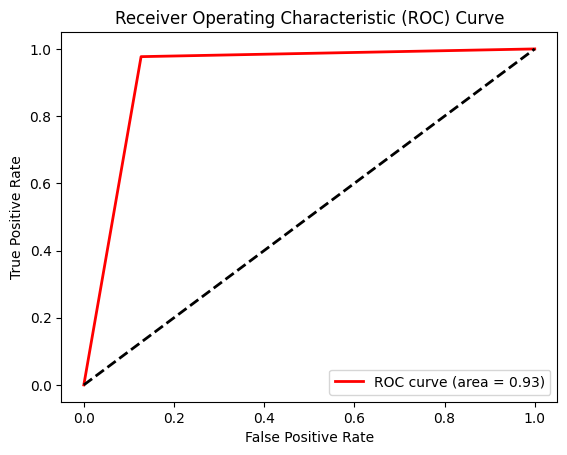

In [187]:
cm=confusion_matrix(y_test,con_y_pred_dt)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_y_pred_dt)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM

In [152]:
from sklearn.svm import SVC

convoluted_svm=SVC(kernel='linear',C=1.0,random_state=42)
convoluted_svm.fit(train_features,y_train)
con_svm_pred=convoluted_svm.predict(test_features)

# Evaluate the Decision Tree classifier
con_accuracy_svm = accuracy_score(y_test, con_svm_pred)
print("Decision Tree Classifier Accuracy:", con_accuracy_svm)

convoluted_svm_class=classification_report(y_test,con_svm_pred)
print("Classification Report: ",convoluted_svm_class)



Decision Tree Classifier Accuracy: 0.9035812672176309
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.89      0.91       189
           1       0.89      0.91      0.90       174

    accuracy                           0.90       363
   macro avg       0.90      0.90      0.90       363
weighted avg       0.90      0.90      0.90       363



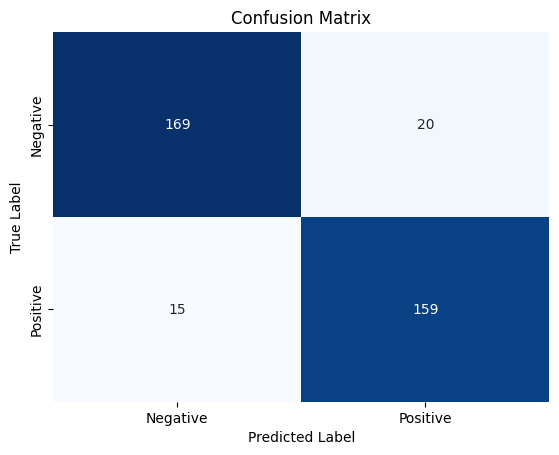

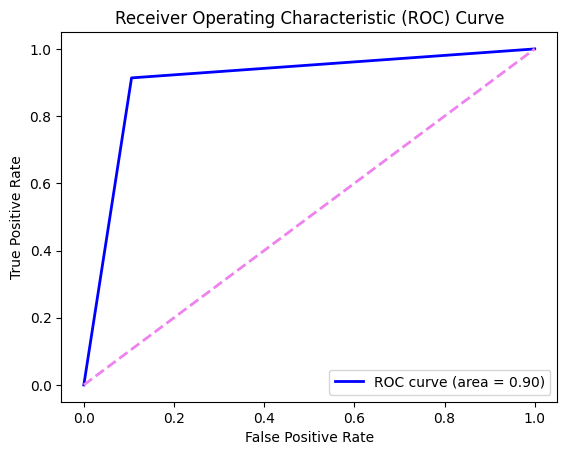

In [189]:
cm=confusion_matrix(y_test,con_svm_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_svm_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
con_knn=KNeighborsClassifier(n_neighbors=3)
con_knn.fit(train_features,y_train)
con_knn_pred=con_knn.predict(test_features)


con_accuracy_knn = accuracy_score(y_test, con_knn_pred)
print("KNN Accuracy:", con_accuracy_knn)

convoluted_knn_class=classification_report(y_test,con_knn_pred)
print("Classification Report: ",convoluted_knn_class)

KNN Accuracy: 0.9035812672176309
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.86      0.90       189
           1       0.86      0.95      0.90       174

    accuracy                           0.90       363
   macro avg       0.91      0.91      0.90       363
weighted avg       0.91      0.90      0.90       363



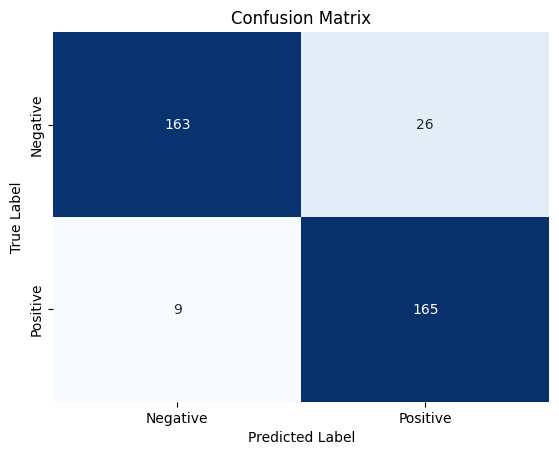

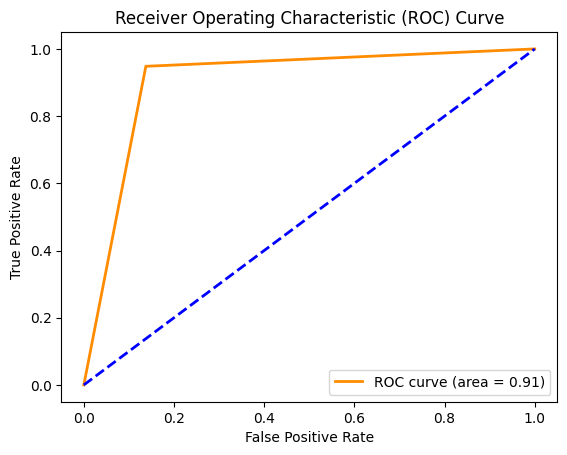

In [183]:
cm=confusion_matrix(y_test,con_knn_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, con_knn_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost

In [184]:
import xgboost as xgb
con_xgb_model=xgb.XGBClassifier(random_state=42)
con_xgb_model.fit(train_features,y_train)

con_xgb_pred=con_xgb_model.predict(test_features)

con_accuracy_xgb = accuracy_score(y_test, con_xgb_pred)
print("XGBoost Accuracy:", con_accuracy_xgb)

convoluted_xgb_class=classification_report(y_test,con_xgb_pred)
print("Classification Report: ",convoluted_xgb_class)

XGBoost Accuracy: 0.90633608815427
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.87      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.91      0.91      0.91       363



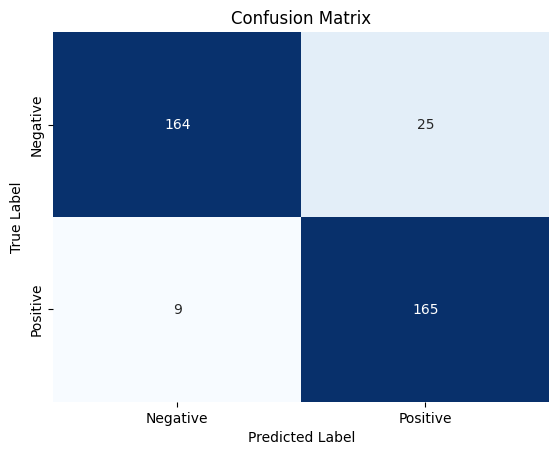

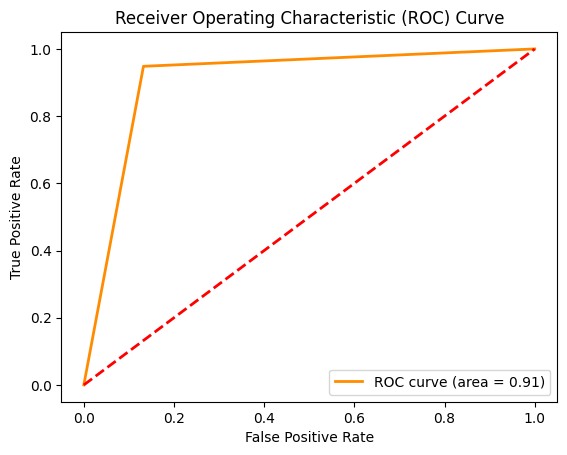

In [190]:
cm=confusion_matrix(y_test,con_xgb_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, con_xgb_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

EXTRA TREE CLASSIFIER

In [191]:
from sklearn.ensemble import ExtraTreesClassifier
con_ext_model=ExtraTreesClassifier(random_state=42)
con_ext_model.fit(train_features,y_train)

con_ext_pred=con_ext_model.predict(test_features)

con_accuracy_ext = accuracy_score(y_test, con_ext_pred)
print("Extra Tree Classifier Accuracy:", con_accuracy_ext)

convoluted_ext_class=classification_report(y_test,con_ext_pred)
print("Classification Report: ",convoluted_ext_class)

Extra Tree Classifier Accuracy: 0.9201101928374655
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.92      0.92      0.92       363
weighted avg       0.93      0.92      0.92       363



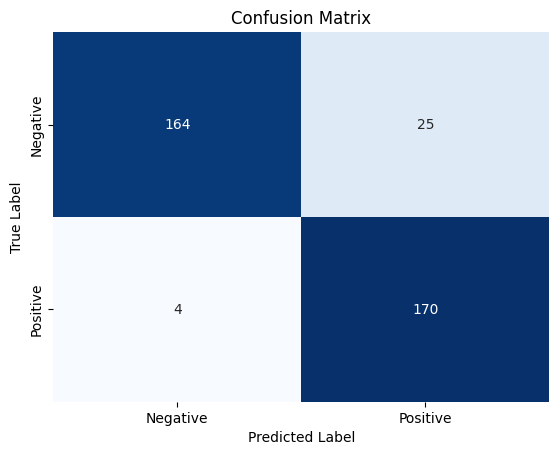

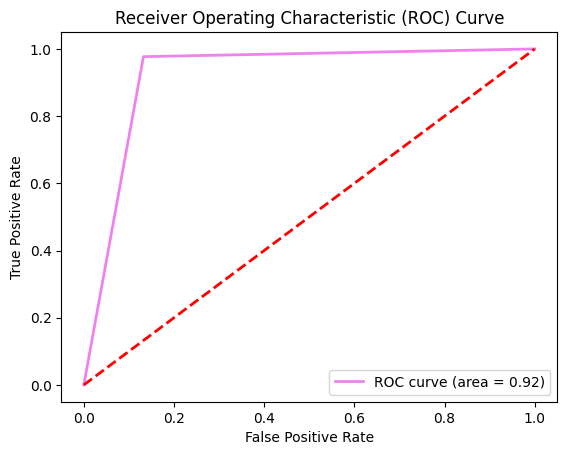

In [193]:
cm=confusion_matrix(y_test,con_ext_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_ext_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='violet', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ADABOOST

In [194]:
from sklearn.ensemble import AdaBoostClassifier
con_ada_model=AdaBoostClassifier(random_state=42)
con_ada_model.fit(train_features,y_train)
con_ada_pred=con_ada_model.predict(test_features)

con_ada_acc=accuracy_score(y_test,con_ada_pred)
con_ada_class=classification_report(y_test,con_ada_pred)

print("Ada Boost Accuracy: ",con_ada_acc)
print("Classification Report: ",con_ada_class)

Ada Boost Accuracy:  0.9090909090909091
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.87      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.91      0.91      0.91       363



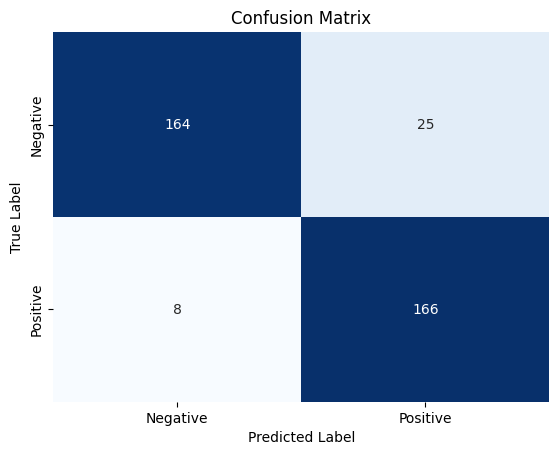

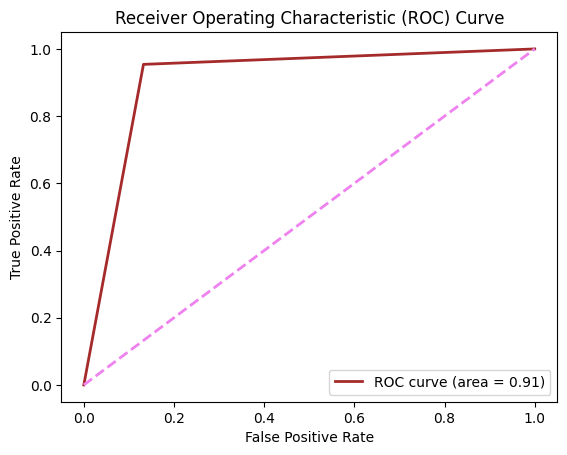

In [198]:
cm=confusion_matrix(y_test,con_ada_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_ada_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

CATBOOST

In [197]:
from catboost import CatBoostClassifier
con_catboost=CatBoostClassifier(random_state=42)
con_catboost.fit(train_features,y_train)
con_catboost_pred=con_catboost.predict(test_features)

con_cat_acc=accuracy_score(y_test,con_catboost_pred)
con_cat_class=classification_report(y_test,con_catboost_pred)

print("CatBoost Accuracy: ",con_cat_acc)
print("Classification Report: ",con_cat_class)

Learning rate set to 0.012077
0:	learn: 0.6626757	total: 23.1ms	remaining: 23s
1:	learn: 0.6340269	total: 40.8ms	remaining: 20.4s
2:	learn: 0.6129293	total: 59.3ms	remaining: 19.7s
3:	learn: 0.5908378	total: 79.6ms	remaining: 19.8s
4:	learn: 0.5689111	total: 111ms	remaining: 22s
5:	learn: 0.5497780	total: 140ms	remaining: 23.3s
6:	learn: 0.5263786	total: 177ms	remaining: 25.1s
7:	learn: 0.5086721	total: 204ms	remaining: 25.3s
8:	learn: 0.4862398	total: 237ms	remaining: 26.1s
9:	learn: 0.4681905	total: 263ms	remaining: 26s
10:	learn: 0.4510918	total: 301ms	remaining: 27s
11:	learn: 0.4347119	total: 325ms	remaining: 26.7s
12:	learn: 0.4218595	total: 363ms	remaining: 27.5s
13:	learn: 0.4060617	total: 382ms	remaining: 26.9s
14:	learn: 0.3924600	total: 407ms	remaining: 26.7s
15:	learn: 0.3799202	total: 432ms	remaining: 26.6s
16:	learn: 0.3664119	total: 455ms	remaining: 26.3s
17:	learn: 0.3513138	total: 478ms	remaining: 26.1s
18:	learn: 0.3395784	total: 500ms	remaining: 25.8s
19:	learn: 0.32

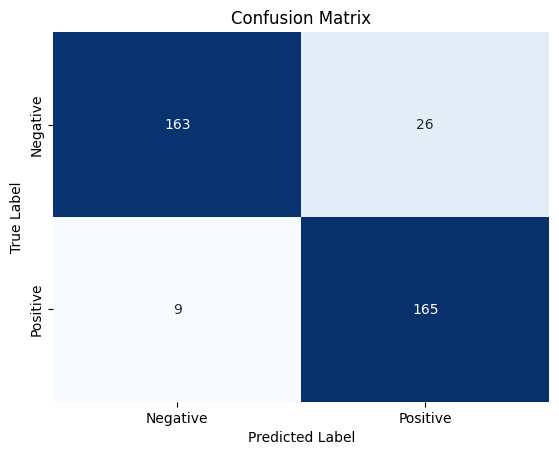

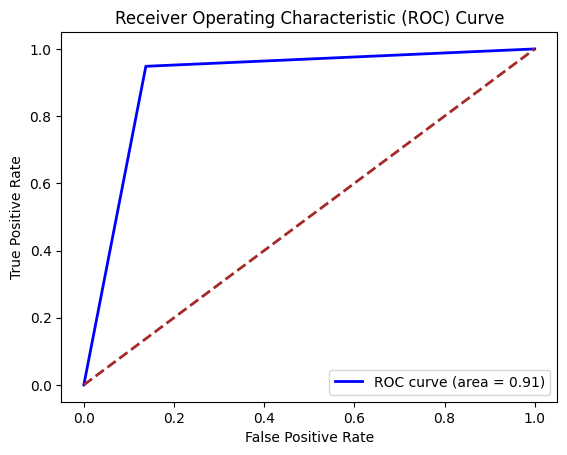

In [200]:
cm=confusion_matrix(y_test,con_catboost_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_catboost_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gradient Boost Classifier

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
con_gbc=GradientBoostingClassifier(random_state=42)
con_gbc.fit(train_features,y_train)
con_gbc_pred=con_gbc.predict(test_features)

con_gbc_acc=accuracy_score(y_test,con_gbc_pred)
con_gbc_class=classification_report(y_test,con_gbc_pred)

print("GradientBoost Accuracy: ",con_gbc_acc)
print("Classification Report: ",con_gbc_class)


GradientBoost Accuracy:  0.9173553719008265
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.86      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.92      0.92      0.92       363
weighted avg       0.92      0.92      0.92       363



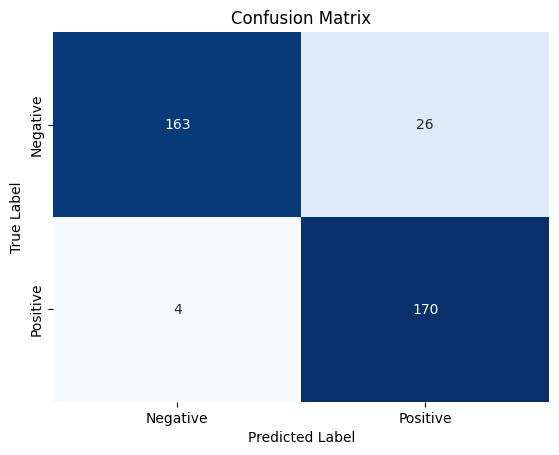

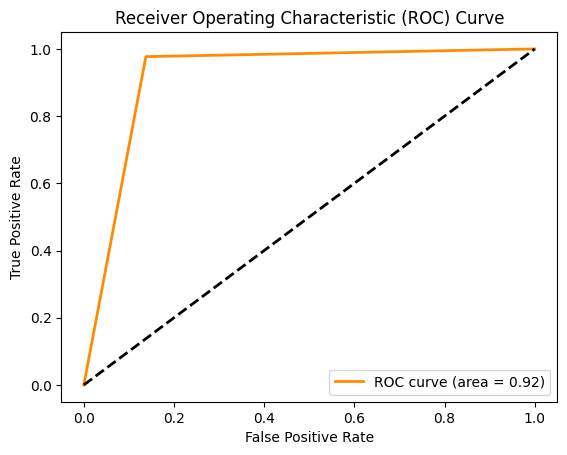

In [204]:
cm=confusion_matrix(y_test,con_gbc_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,con_gbc_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

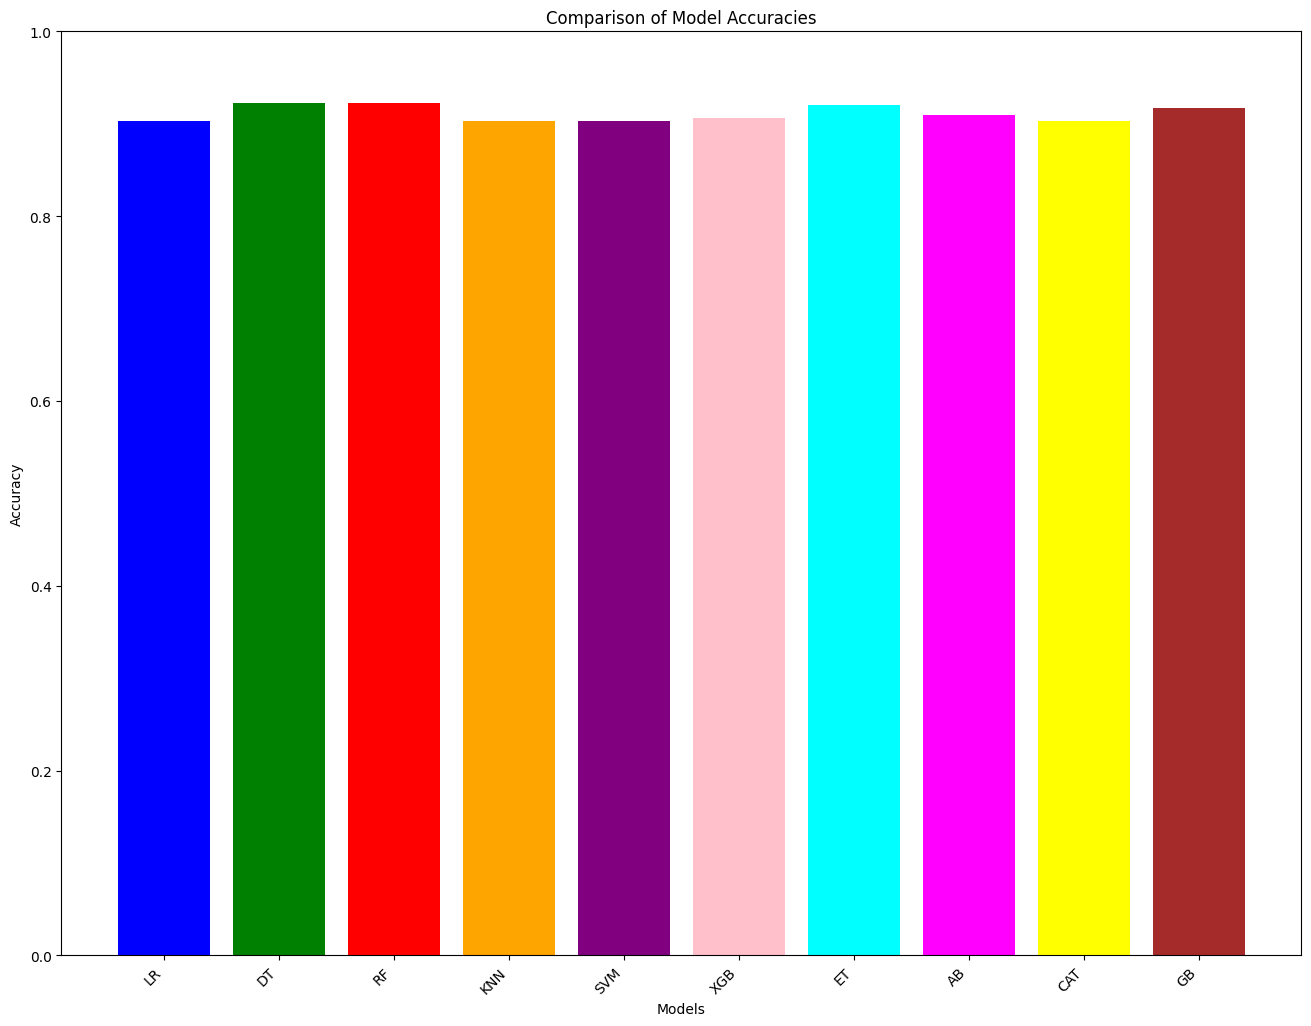

In [241]:
convoluted_models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'ET','AB', 'CAT', 'GB']
con_accuracies = [convoluted_log_acc,accuracy_dt,convoluted_rf_acc,con_accuracy_svm,con_accuracy_knn,con_accuracy_xgb,con_accuracy_ext,con_ada_acc,con_cat_acc,con_gbc_acc]
# Plotting the bar plot
plt.figure(figsize=(16, 12))
plt.bar(convoluted_models, con_accuracies,color=['blue', 'green', 'red', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()

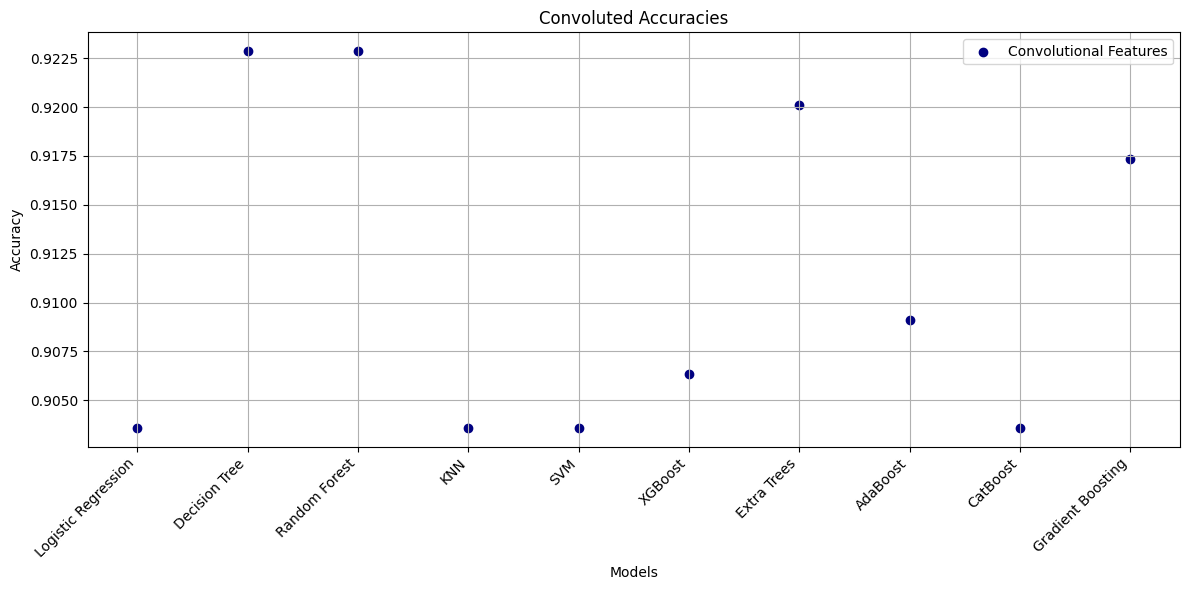

In [274]:


# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Extra Trees', 'AdaBoost', 'CatBoost', 'Gradient Boosting']
convolutional_accuracies = [convoluted_log_acc, accuracy_dt, convoluted_rf_acc, con_accuracy_knn, con_accuracy_svm, con_accuracy_xgb, con_accuracy_ext, con_ada_acc, con_cat_acc, con_gbc_acc]

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(models, convolutional_accuracies, marker='o', color='navy', label='Convolutional Features')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Convoluted Accuracies')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


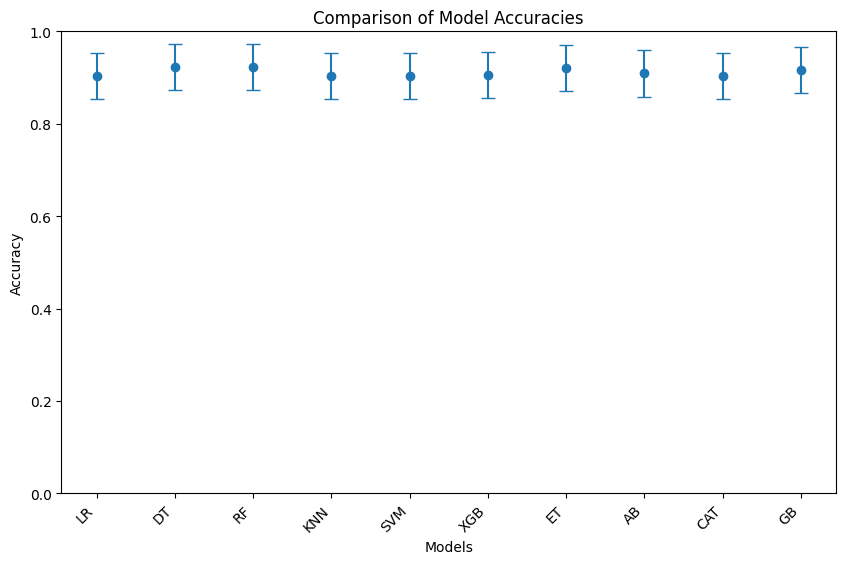

In [276]:
con_models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'ET','AB', 'CAT', 'GB']
con_accuracies = [convoluted_log_acc, accuracy_dt, convoluted_rf_acc, con_accuracy_knn, con_accuracy_svm, con_accuracy_xgb, con_accuracy_ext, con_ada_acc, con_cat_acc, con_gbc_acc]


plt.figure(figsize=(10, 6))
plt.errorbar(con_models, con_accuracies, yerr=0.05, fmt='o', capsize=5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()


COMAPRISON  FOR NORMAL AND CONVOLUTED

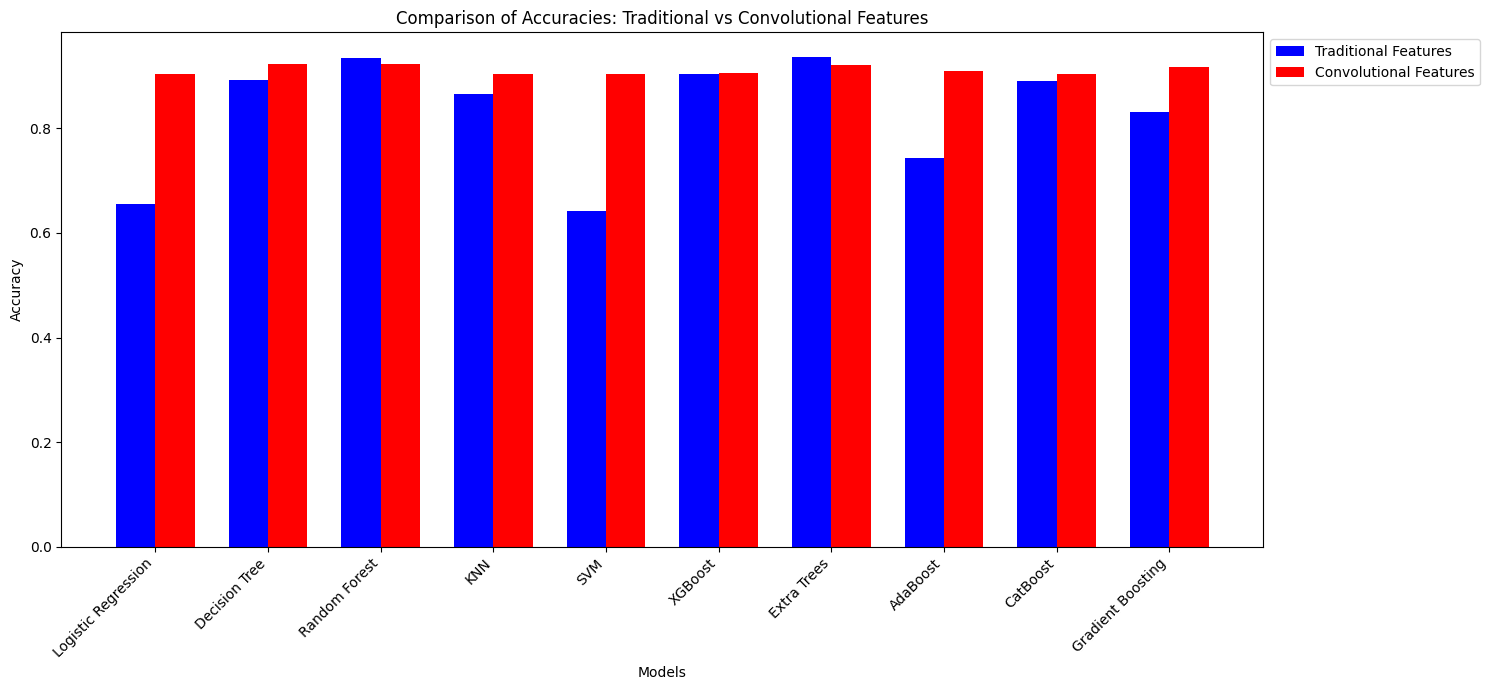

In [278]:


# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Extra Trees', 'AdaBoost', 'CatBoost', 'Gradient Boosting']
traditional_accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy, svc_accuracy, xgb_acc, etree_acc, ada_boost_acc, catboost_acc, gbc_acc]
convolutional_accuracies = [convoluted_log_acc, accuracy_dt, convoluted_rf_acc, con_accuracy_knn, con_accuracy_svm, con_accuracy_xgb, con_accuracy_ext, con_ada_acc, con_cat_acc, con_gbc_acc]

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.35
index = range(len(models))

traditional_bars = ax.bar(index, traditional_accuracies, bar_width, label='Traditional Features', color='blue')
convolutional_bars = ax.bar([i + bar_width for i in index], convolutional_accuracies, bar_width, label='Convolutional Features', color='red')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracies: Traditional vs Convolutional Features')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


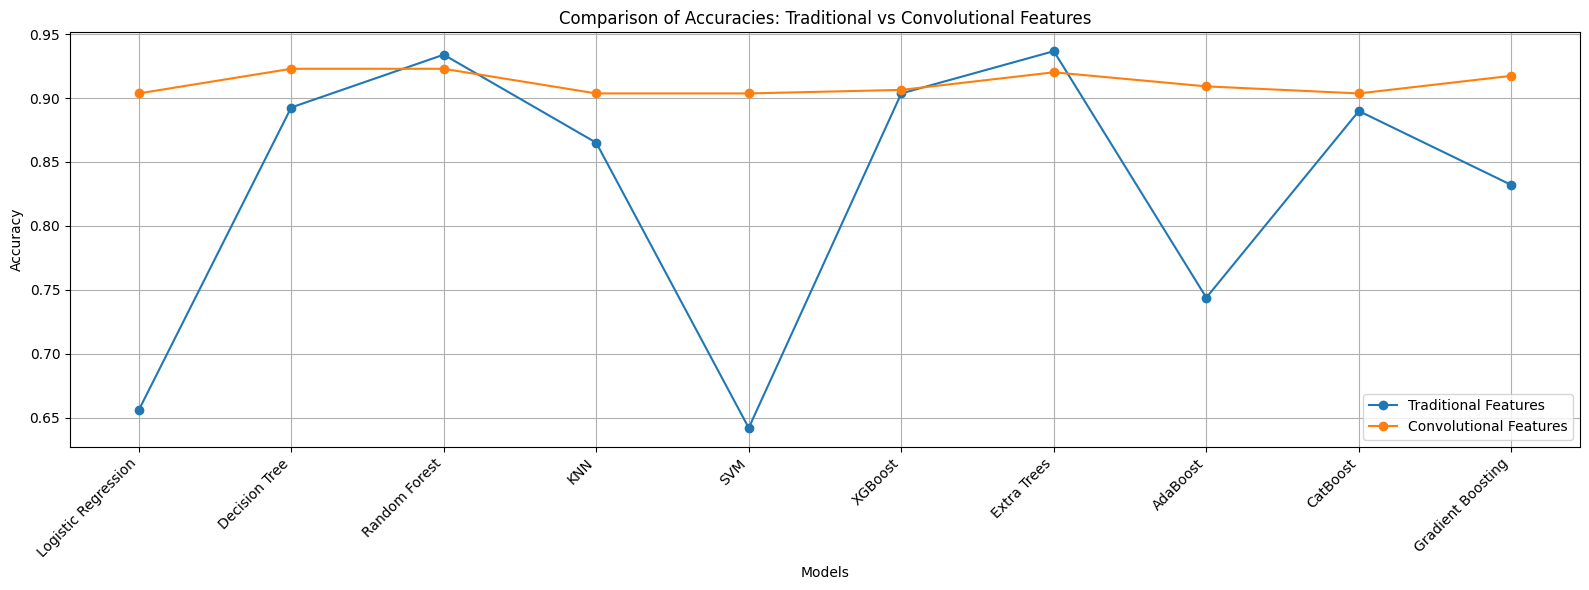

In [256]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Extra Trees', 'AdaBoost', 'CatBoost', 'Gradient Boosting']
traditional_accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy, svc_accuracy, xgb_acc, etree_acc, ada_boost_acc, catboost_acc, gbc_acc]
convolutional_accuracies = [convoluted_log_acc, accuracy_dt, convoluted_rf_acc, con_accuracy_knn, con_accuracy_svm, con_accuracy_xgb, con_accuracy_ext, con_ada_acc, con_cat_acc, con_gbc_acc]

# Plotting
plt.figure(figsize=(16,6))

plt.plot(models, traditional_accuracies, marker='o', label='Traditional Features')
plt.plot(models, convolutional_accuracies, marker='o', label='Convolutional Features')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies: Traditional vs Convolutional Features')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


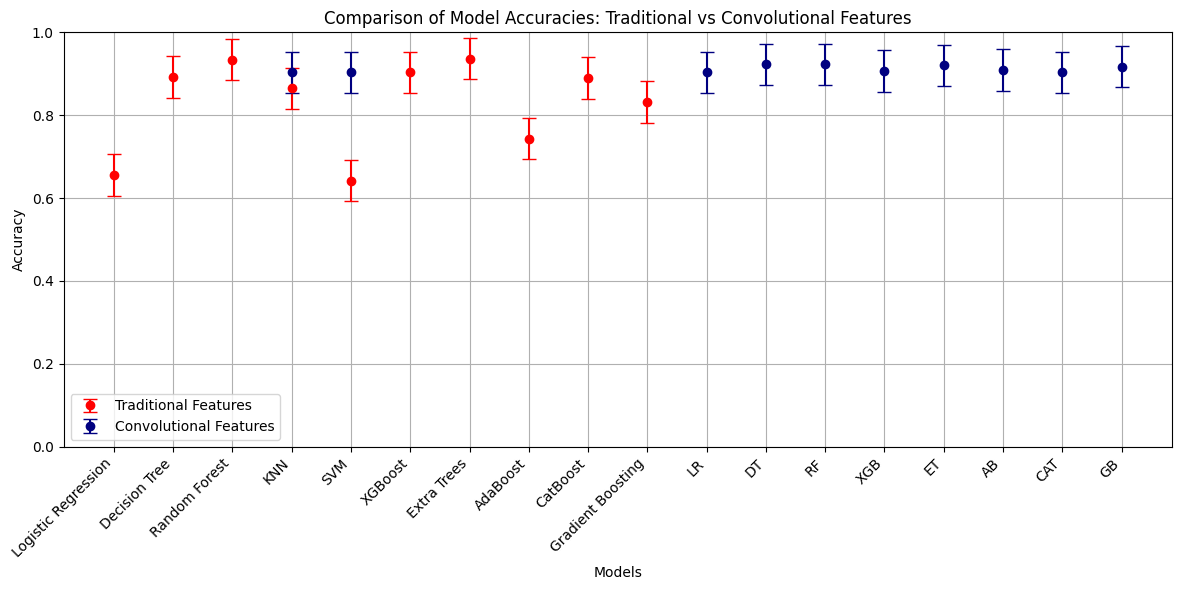

In [277]:
import matplotlib.pyplot as plt

# Traditional models and accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Extra Trees', 'AdaBoost', 'CatBoost', 'Gradient Boosting']
traditional_accuracies = [log_accuracy, dtree_accuracy, rf_accuracy, knn_accuracy, svc_accuracy, xgb_acc, etree_acc, ada_boost_acc, catboost_acc, gbc_acc]

# Convolutional models and accuracies
con_models = ['LR', 'DT', 'RF', 'KNN', 'SVM', 'XGB', 'ET', 'AB', 'CAT', 'GB']
con_accuracies = [convoluted_log_acc, accuracy_dt, convoluted_rf_acc, con_accuracy_knn, con_accuracy_svm, con_accuracy_xgb, con_accuracy_ext, con_ada_acc, con_cat_acc, con_gbc_acc]

# Plotting
plt.figure(figsize=(12, 6))

# Plot traditional accuracies
plt.errorbar(models, traditional_accuracies, yerr=0.05, fmt='o', capsize=5, label='Traditional Features', color='red')

# Plot convolutional accuracies
plt.errorbar(con_models, con_accuracies, yerr=0.05, fmt='o', capsize=5, label='Convolutional Features', color='navy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies: Traditional vs Convolutional Features')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


ENSEMBLE LEARNING

In [205]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples containing the name and the classifier
estimators = [('Random Forest', convoluted_rf), ('Decision Tree', dt_classifier)]

voting_classifier = VotingClassifier(estimators, voting='hard')

# Train the Voting Classifier
voting_classifier.fit(train_features, y_train)

# Test the Voting Classifier
voting_y_pred1 = voting_classifier.predict(test_features)

# Calculate accuracy
voting_acc = accuracy_score(y_test, voting_y_pred1)
print("Voting Classifier Accuracy:", voting_acc)

voting_report1 = classification_report(y_test, voting_y_pred1)

# Print the classification report
print("Classification Report:\n", voting_report1)

Voting Classifier Accuracy: 0.9228650137741047
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.88      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



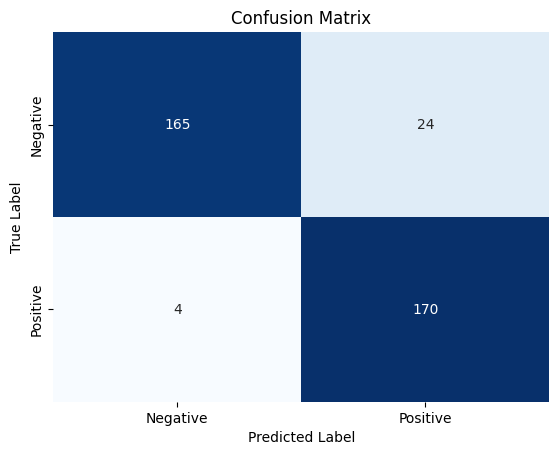

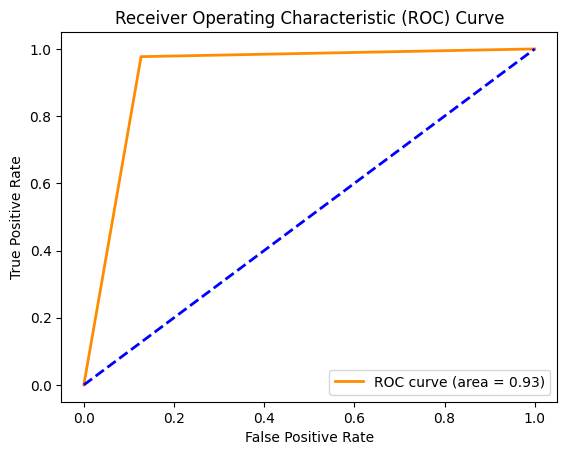

In [206]:
cm=confusion_matrix(y_test,voting_y_pred1)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,voting_y_pred1)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST AND SVM

In [207]:
estimators=[('Random Forest', convoluted_rf),('SVM', convoluted_svm)]
rf_svm_voting=VotingClassifier(estimators,voting='hard')

rf_svm_voting.fit(train_features,y_train)
rf_svm_pred=rf_svm_voting.predict(test_features)


rf_svm_acc = accuracy_score(y_test, rf_svm_pred)
print("Voting Classifier Accuracy:", rf_svm_acc)

rf_svm_class= classification_report(y_test, rf_svm_pred)

# Print the classification report
print("Classification Report:\n", rf_svm_class)

Voting Classifier Accuracy: 0.9146005509641874
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       189
           1       0.88      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.92      0.92      0.91       363
weighted avg       0.92      0.91      0.91       363



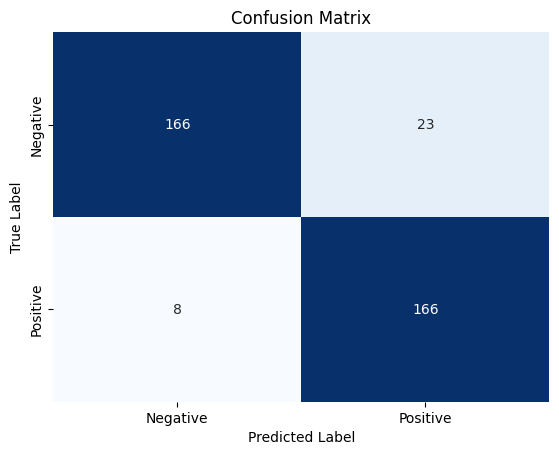

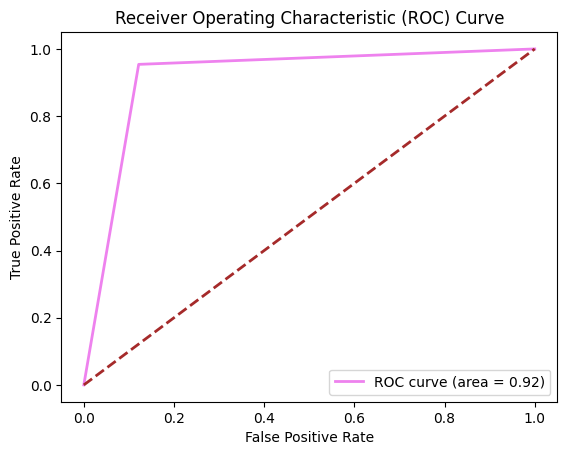

In [210]:
cm=confusion_matrix(y_test,rf_svm_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_svm_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='violet', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST AND EXT

In [212]:
estimators=[('Random Forest', convoluted_rf),('EXT', con_ext_model)]
rf_ext_voting=VotingClassifier(estimators,voting='hard')

rf_ext_voting.fit(train_features,y_train)
rf_ext_pred=rf_ext_voting.predict(test_features)


rf_ext_acc = accuracy_score(y_test, rf_ext_pred)
print("Voting Classifier Accuracy:", rf_ext_acc)

rf_ext_class= classification_report(y_test, rf_ext_pred)

# Print the classification report
print("Classification Report:\n", rf_ext_class)

Voting Classifier Accuracy: 0.9228650137741047
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.88      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



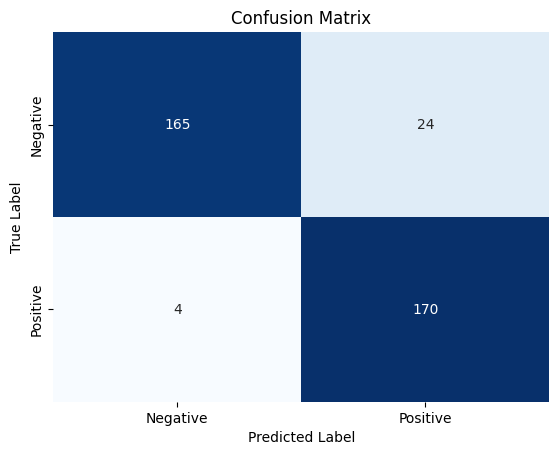

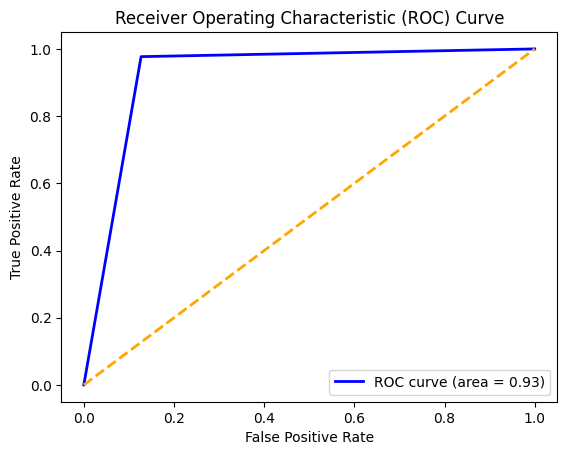

In [214]:
cm=confusion_matrix(y_test,rf_ext_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_ext_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RF AND ADA

In [215]:
estimators=[('Random Forest', convoluted_rf),('ADA', con_ada_model)]
rf_ada_voting=VotingClassifier(estimators,voting='hard')

rf_ada_voting.fit(train_features,y_train)
rf_ada_pred=rf_ada_voting.predict(test_features)


rf_ada_acc = accuracy_score(y_test, rf_ada_pred)
print("Voting Classifier Accuracy:", rf_ada_acc)

rf_ada_class= classification_report(y_test, rf_ada_pred)

# Print the classification report
print("Classification Report:\n", rf_ada_class)

Voting Classifier Accuracy: 0.9118457300275482
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.87      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.92      0.91      0.91       363



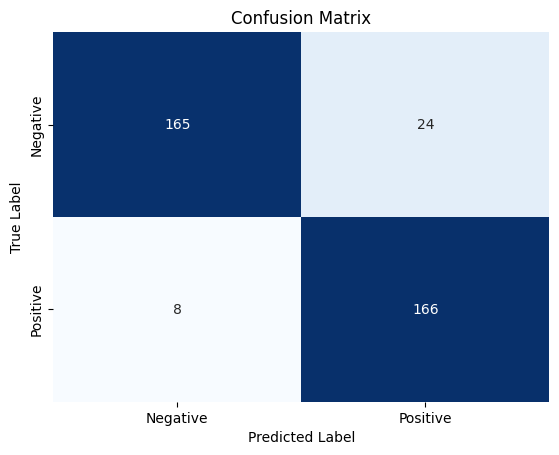

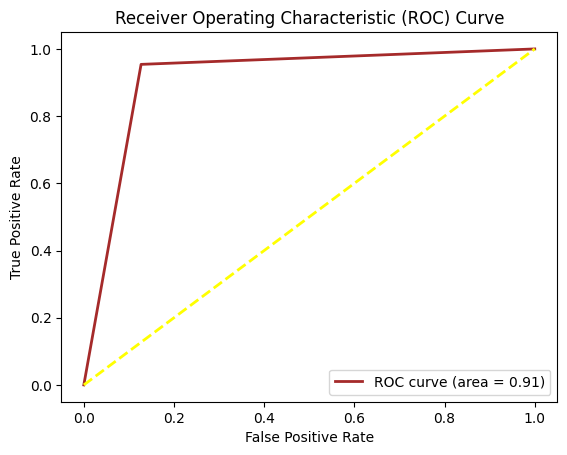

In [217]:
cm=confusion_matrix(y_test,rf_ada_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_ada_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RF AND XGB

In [218]:
estimators=[('Random Forest', convoluted_rf),('XGB', con_xgb_model)]
rf_xgb_voting=VotingClassifier(estimators,voting='hard')

rf_xgb_voting.fit(train_features,y_train)
rf_xgb_pred=rf_xgb_voting.predict(test_features)


rf_xgb_acc = accuracy_score(y_test, rf_xgb_pred)
print("Voting Classifier Accuracy:", rf_xgb_acc)

rf_xgb_class= classification_report(y_test, rf_xgb_pred)

# Print the classification report
print("Classification Report:\n", rf_xgb_class)

Voting Classifier Accuracy: 0.9090909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.87      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.91      0.91      0.91       363



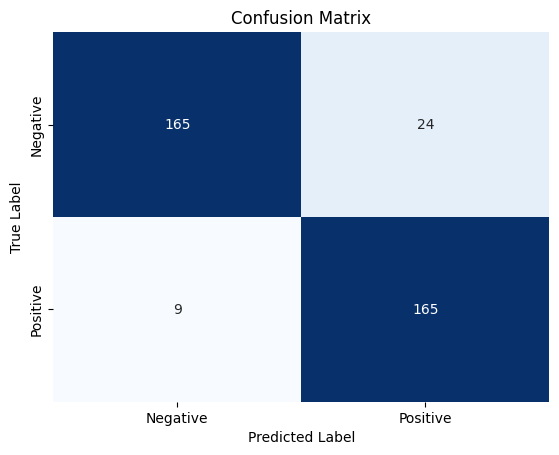

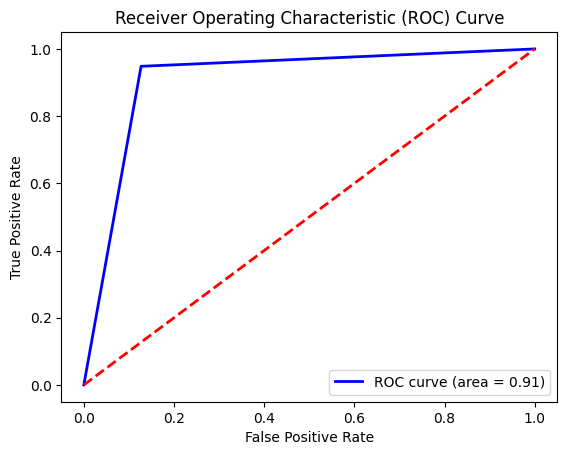

In [220]:
cm=confusion_matrix(y_test,rf_xgb_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_xgb_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST AND  CATBOOST

In [221]:
estimators=[('Random Forest', convoluted_rf),('cat', con_catboost)]
rf_cat_voting=VotingClassifier(estimators,voting='hard')

rf_cat_voting.fit(train_features,y_train)
rf_cat_pred=rf_cat_voting.predict(test_features)


rf_cat_acc = accuracy_score(y_test, rf_cat_pred)
print("Voting Classifier Accuracy:", rf_cat_acc)

rf_cat_class= classification_report(y_test, rf_cat_pred)

# Print the classification report
print("Classification Report:\n", rf_cat_class)

Learning rate set to 0.012077
0:	learn: 0.6626757	total: 17.3ms	remaining: 17.3s
1:	learn: 0.6340269	total: 33.6ms	remaining: 16.7s
2:	learn: 0.6129293	total: 50ms	remaining: 16.6s
3:	learn: 0.5908378	total: 66.8ms	remaining: 16.6s
4:	learn: 0.5689111	total: 83ms	remaining: 16.5s
5:	learn: 0.5497780	total: 99.2ms	remaining: 16.4s
6:	learn: 0.5263786	total: 116ms	remaining: 16.4s
7:	learn: 0.5086721	total: 132ms	remaining: 16.4s
8:	learn: 0.4862398	total: 149ms	remaining: 16.4s
9:	learn: 0.4681905	total: 165ms	remaining: 16.3s
10:	learn: 0.4510918	total: 181ms	remaining: 16.3s
11:	learn: 0.4347119	total: 200ms	remaining: 16.5s
12:	learn: 0.4218595	total: 219ms	remaining: 16.6s
13:	learn: 0.4060617	total: 235ms	remaining: 16.5s
14:	learn: 0.3924600	total: 252ms	remaining: 16.5s
15:	learn: 0.3799202	total: 268ms	remaining: 16.5s
16:	learn: 0.3664119	total: 285ms	remaining: 16.5s
17:	learn: 0.3513138	total: 301ms	remaining: 16.4s
18:	learn: 0.3395784	total: 321ms	remaining: 16.6s
19:	learn

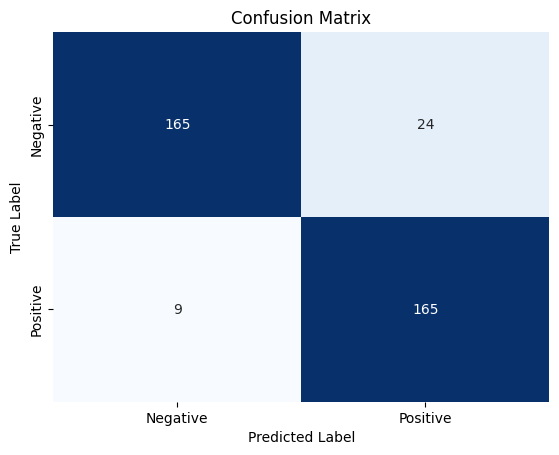

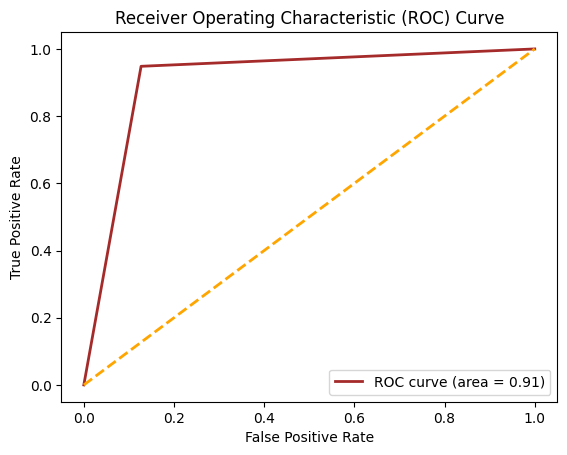

In [223]:
cm=confusion_matrix(y_test,rf_cat_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_cat_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST AND GRADIENT BOOST

In [225]:
estimators=[('Random Forest', convoluted_rf),('GB', con_gbc)]
rf_gbc_voting=VotingClassifier(estimators,voting='hard')

rf_gbc_voting.fit(train_features,y_train)
rf_gbc_pred=rf_gbc_voting.predict(test_features)


rf_gbc_acc = accuracy_score(y_test, rf_gbc_pred)
print("Voting Classifier Accuracy:", rf_gbc_acc)

rf_gbc_class= classification_report(y_test, rf_gbc_pred)

# Print the classification report
print("Classification Report:\n", rf_gbc_class)

Voting Classifier Accuracy: 0.9201101928374655
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.92      0.92      0.92       363
weighted avg       0.93      0.92      0.92       363



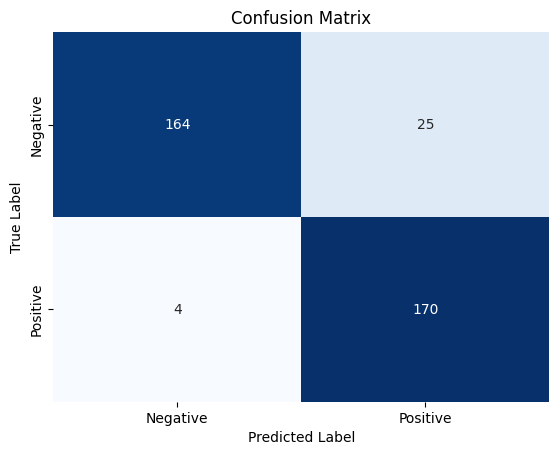

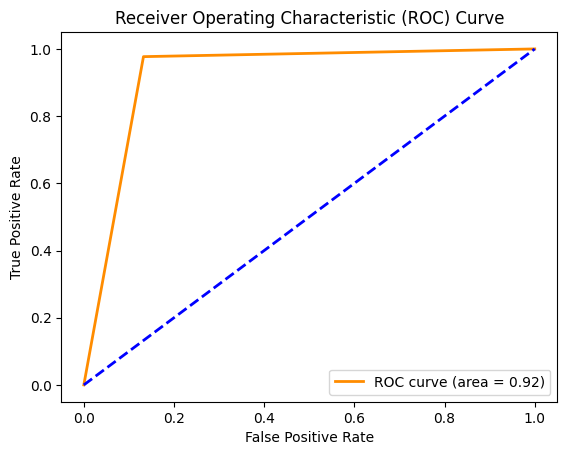

In [226]:
cm=confusion_matrix(y_test,rf_gbc_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_gbc_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST AND LOGISTIC REGRESSION

In [227]:
estimators=[('Random Forest', convoluted_rf),('LOG REG', con_log_model)]
rf_log_voting=VotingClassifier(estimators,voting='hard')

rf_log_voting.fit(train_features,y_train)
rf_log_pred=rf_log_voting.predict(test_features)


rf_log_acc = accuracy_score(y_test, rf_log_pred)
print("Voting Classifier Accuracy:", rf_log_acc)

rf_log_class= classification_report(y_test, rf_log_pred)

# Print the classification report
print("Classification Report:\n", rf_log_class)

Voting Classifier Accuracy: 0.9146005509641874
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       189
           1       0.88      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.92      0.92      0.91       363
weighted avg       0.92      0.91      0.91       363



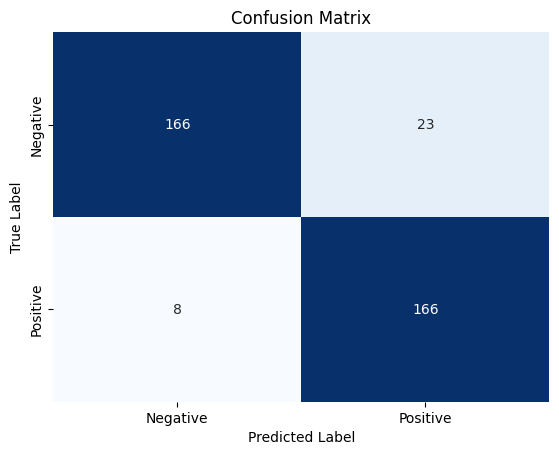

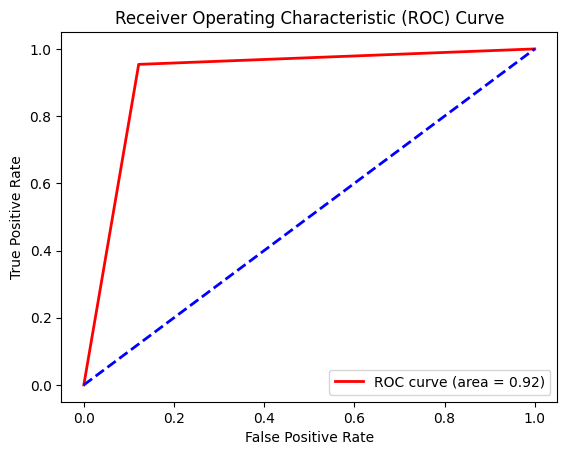

In [228]:
cm=confusion_matrix(y_test,rf_log_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,rf_log_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM AND EXTRA TREE

In [230]:
estimators=[('SVM', convoluted_svm),('ET', con_ext_model)]
svm_ext_voting=VotingClassifier(estimators,voting='hard')

svm_ext_voting.fit(train_features,y_train)
svm_ext_pred=svm_ext_voting.predict(test_features)


svm_ext_acc = accuracy_score(y_test, svm_ext_pred)
print("Voting Classifier Accuracy:", svm_ext_acc)

svm_ext_class= classification_report(y_test, svm_ext_pred)

# Print the classification report
print("Classification Report:\n", svm_ext_class)

Voting Classifier Accuracy: 0.9118457300275482
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       189
           1       0.88      0.95      0.91       174

    accuracy                           0.91       363
   macro avg       0.91      0.91      0.91       363
weighted avg       0.91      0.91      0.91       363



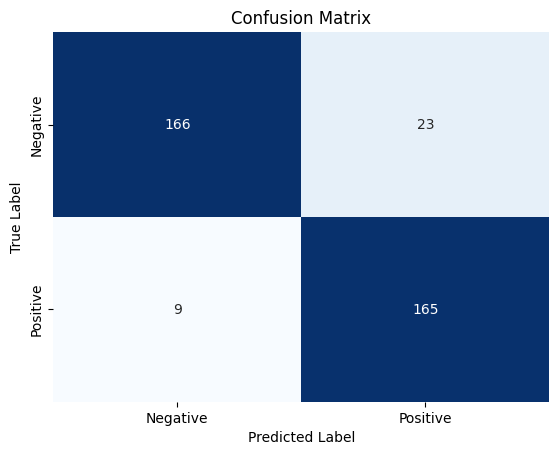

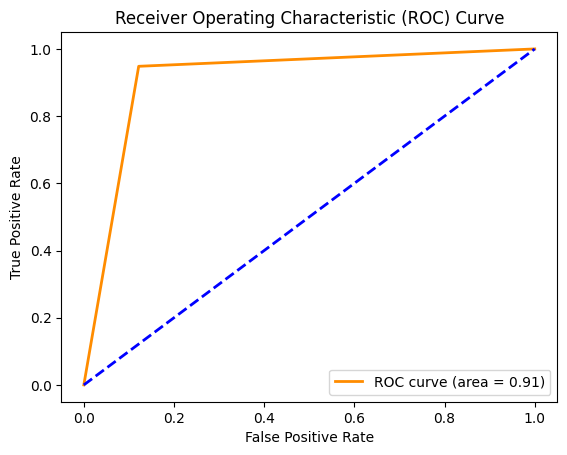

In [232]:
cm=confusion_matrix(y_test,svm_ext_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,svm_ext_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM AND LOGISTIC REGRESSION

In [233]:
estimators=[('Random Forest', convoluted_svm),('LOG REG', con_log_model)]
svm_log_voting=VotingClassifier(estimators,voting='hard')

svm_log_voting.fit(train_features,y_train)
svm_log_pred=svm_log_voting.predict(test_features)


svm_log_acc = accuracy_score(y_test, svm_log_pred)
print("Voting Classifier Accuracy:", svm_log_acc)

svm_log_class= classification_report(y_test, svm_log_pred)

# Print the classification report
print("Classification Report:\n", svm_log_class)

Voting Classifier Accuracy: 0.9035812672176309
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       189
           1       0.86      0.95      0.90       174

    accuracy                           0.90       363
   macro avg       0.91      0.91      0.90       363
weighted avg       0.91      0.90      0.90       363



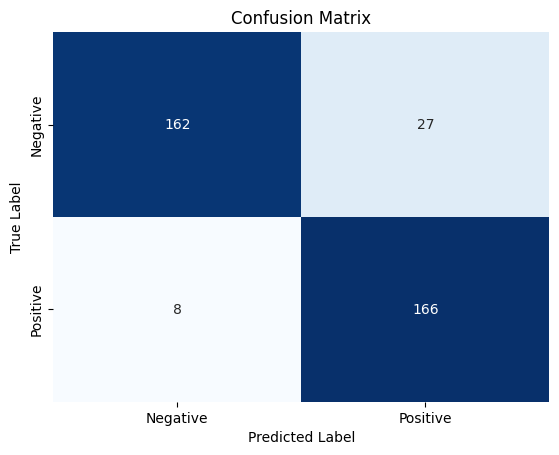

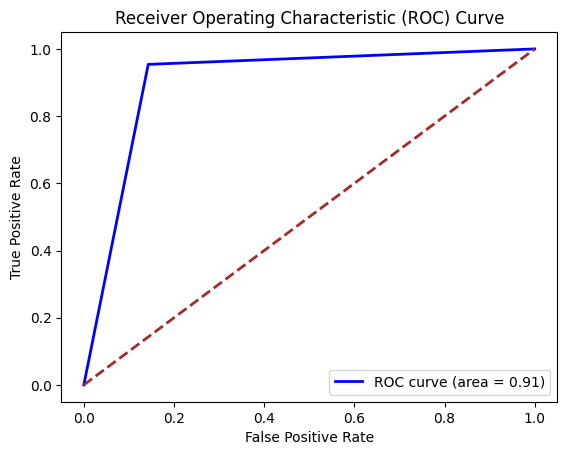

In [235]:
cm=confusion_matrix(y_test,svm_log_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
plt.show()


fpr, tpr, thresholds = roc_curve(y_test,svm_log_pred)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='brown', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

COMPARISON BETWEEN ENSEMBLE LEARNING

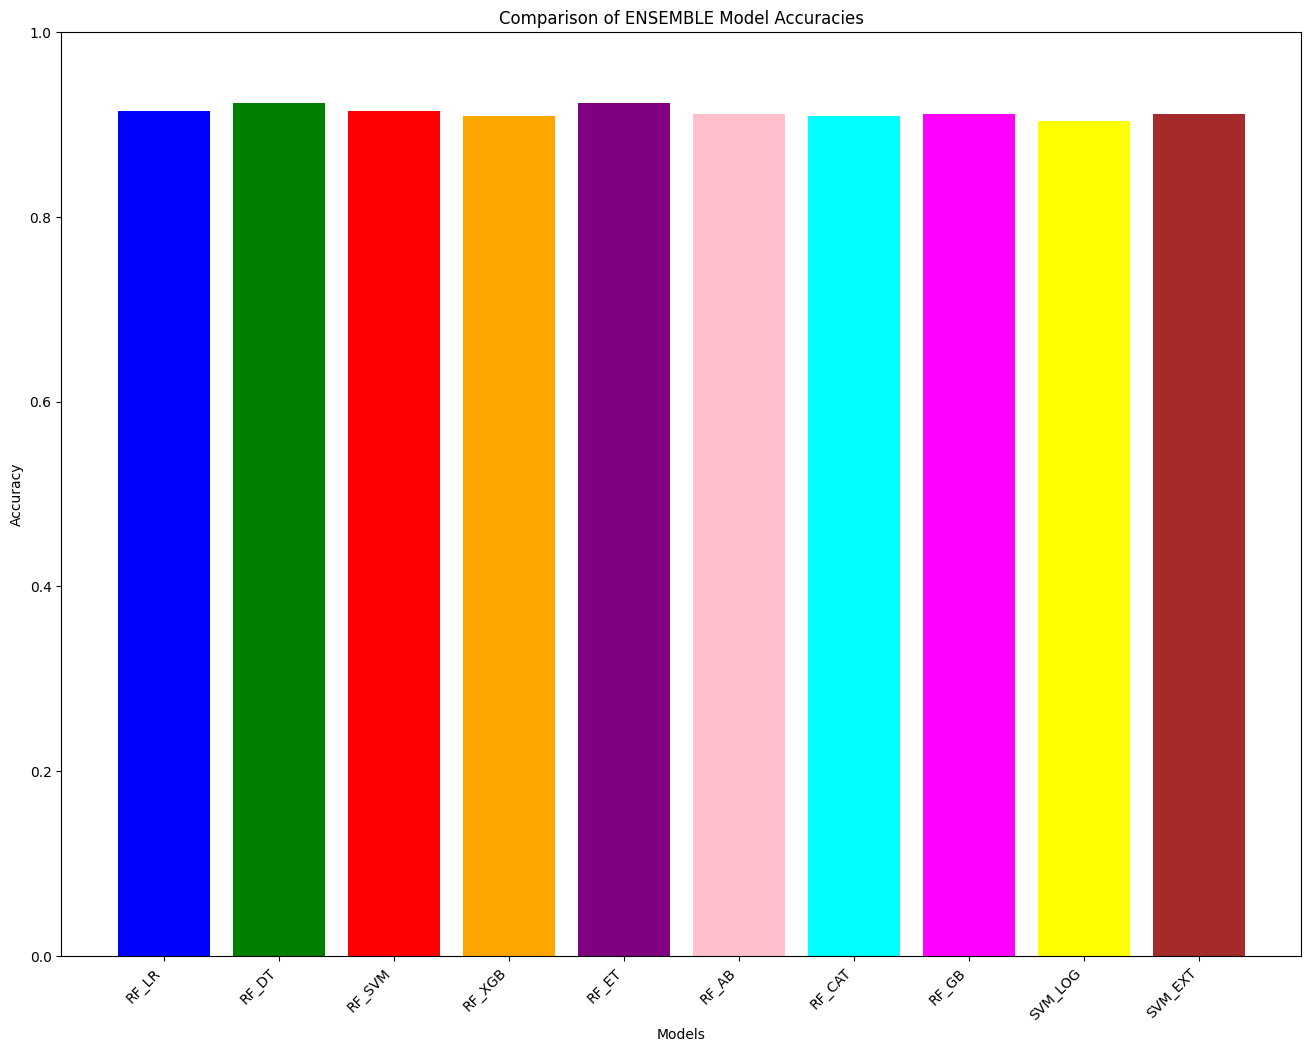

In [280]:
ensemble_models = ['RF_LR', 'RF_DT','RF_SVM','RF_XGB','RF_ET','RF_AB', 'RF_CAT', 'RF_GB','SVM_LOG','SVM_EXT']
ensemble_accuracies = [rf_log_acc,voting_acc,rf_svm_acc,rf_xgb_acc,rf_ext_acc,rf_ada_acc,rf_cat_acc,rf_gbc_acc,svm_log_acc,svm_ext_acc]
# Plotting the bar plot
plt.figure(figsize=(16, 12))
plt.bar(ensemble_models, ensemble_accuracies,color=['blue', 'green', 'red', 'orange', 'purple', 'pink', 'cyan', 'magenta', 'yellow', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of ENSEMBLE Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.show()


HYPERPARAMATER TUNING

RF AND EXT

In [282]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

# Define parameter distributions for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Define parameter distributions for Extra Trees
param_dist_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Create Random Forest and Extra Trees classifiers
rf_model = RandomForestClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)

# Create a list of tuples containing the name and the classifier
estimators = [('Random Forest', rf_model), ('EXT', et_model)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators, voting='hard')

# Define the parameter grid for RandomizedSearchCV
param_dist_voting = {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'EXT__n_estimators': [50, 100, 200],
    'EXT__max_depth': [None, 10, 20],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=voting_classifier, param_distributions=param_dist_voting,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(train_features, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Test the best estimator
y_pred = best_estimator.predict(test_features)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Best Voting Classifier Accuracy:", acc)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_rep)


Best Voting Classifier Accuracy: 0.9228650137741047
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



RF AND EXT GRID

In [283]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
}

# Define parameter grid for Extra Trees
param_grid_et = {
    'EXT__n_estimators': [50, 100, 200],
    'EXT__max_depth': [None, 10, 20],
}

# Create Random Forest and Extra Trees classifiers
rf_model = RandomForestClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)

# Create a list of tuples containing the name and the classifier
estimators = [('Random Forest', rf_model), ('EXT', et_model)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators, voting='hard')

# Define the parameter grid for GridSearchCV
param_grid_voting = {
    **param_grid_rf,
    **param_grid_et
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid_voting,
                           cv=5, scoring='accuracy')
grid_search.fit(train_features, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Test the best estimator
y_pred = best_estimator.predict(test_features)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Best Voting Classifier Accuracy:", acc)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_rep)



Best Voting Classifier Accuracy: 0.9228650137741047
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       189
           1       0.87      0.98      0.92       174

    accuracy                           0.92       363
   macro avg       0.93      0.93      0.92       363
weighted avg       0.93      0.92      0.92       363



K FOLD VALIDATION

Fold 1:
Validation Accuracy: 0.9759450171821306
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       157
           1       0.95      1.00      0.97       134

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



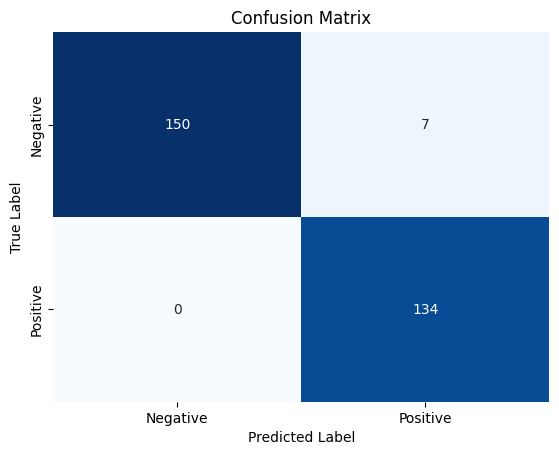

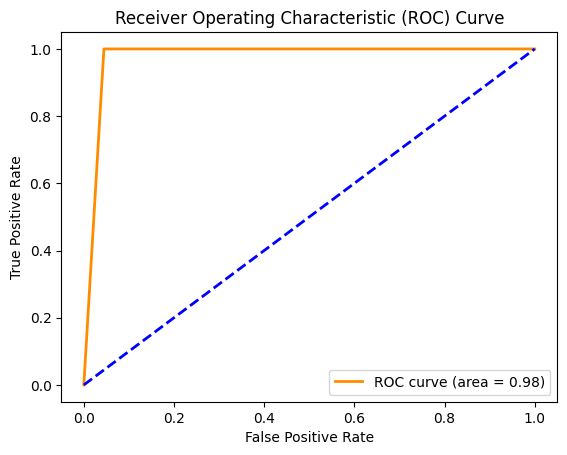

Fold 2:
Validation Accuracy: 0.9586206896551724
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       153
           1       0.96      0.96      0.96       137

    accuracy                           0.96       290
   macro avg       0.96      0.96      0.96       290
weighted avg       0.96      0.96      0.96       290



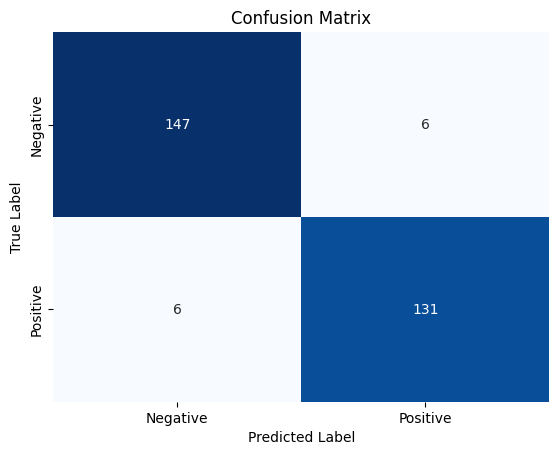

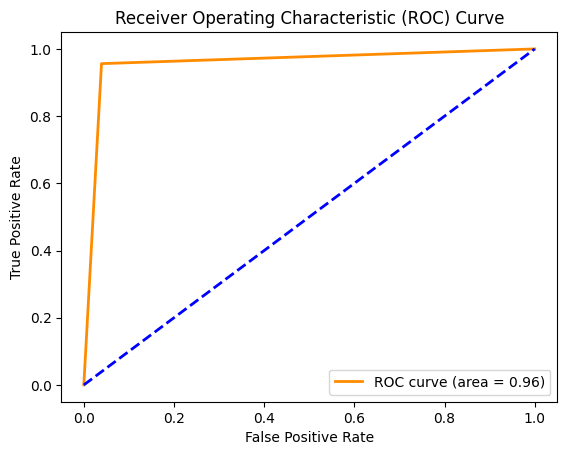

Fold 3:
Validation Accuracy: 0.9896551724137931
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.99      0.99      0.99       143

    accuracy                           0.99       290
   macro avg       0.99      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290



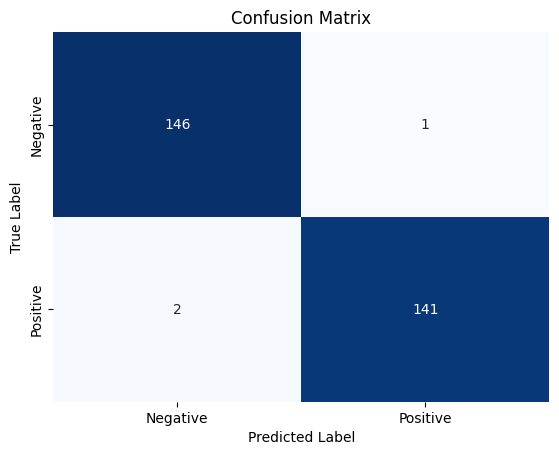

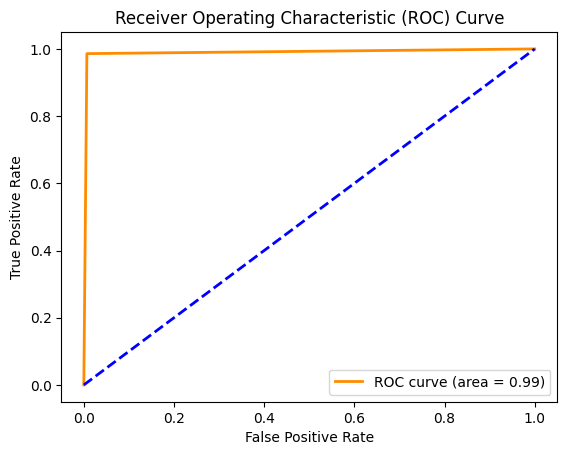

Fold 4:
Validation Accuracy: 0.9724137931034482
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       130
           1       0.99      0.96      0.97       160

    accuracy                           0.97       290
   macro avg       0.97      0.97      0.97       290
weighted avg       0.97      0.97      0.97       290



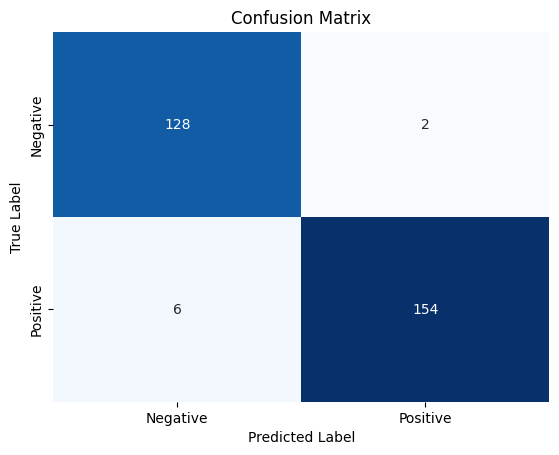

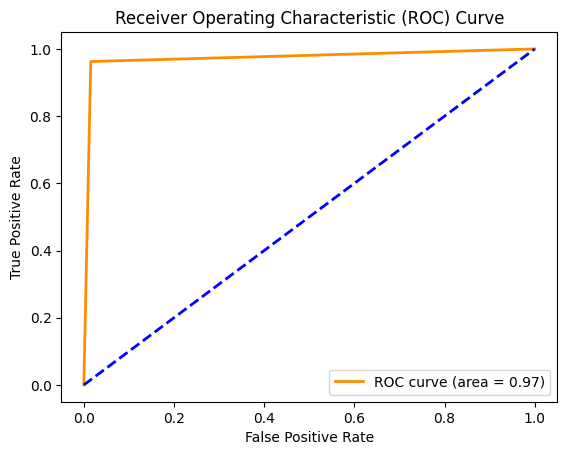

Fold 5:
Validation Accuracy: 0.9586206896551724
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       131
           1       0.96      0.96      0.96       159

    accuracy                           0.96       290
   macro avg       0.96      0.96      0.96       290
weighted avg       0.96      0.96      0.96       290



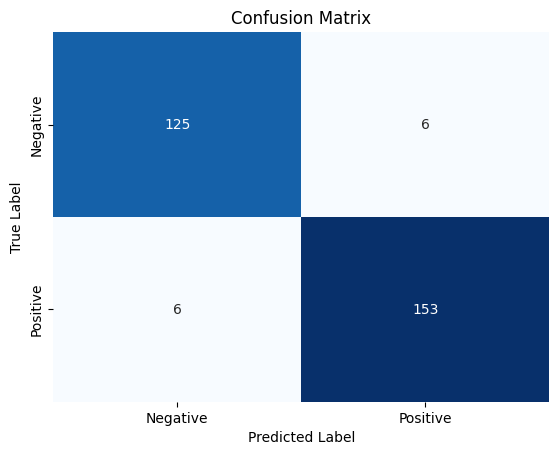

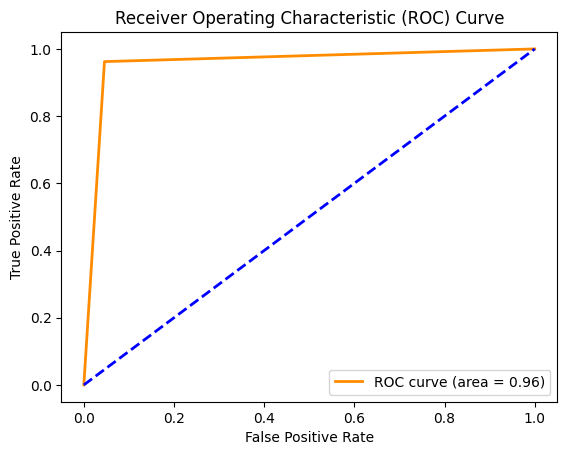

In [287]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

# Define parameter grid for Random Forest
param_grid_rf = {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
}

# Define parameter grid for Extra Trees
param_grid_et = {
    'EXT__n_estimators': [50, 100, 200],
    'EXT__max_depth': [None, 10, 20],
}

# Create Random Forest and Extra Trees classifiers
rf_model = RandomForestClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)

# Create a list of tuples containing the name and the classifier
estimators = [('Random Forest', rf_model), ('EXT', et_model)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators, voting='hard')

# Define the parameter grid for GridSearchCV
param_grid_voting = {
    **param_grid_rf,
    **param_grid_et
}

# Perform 5-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(train_features, y_train), 1):
    print(f"Fold {fold}:")
    X_train_fold, X_val_fold = train_features[train_idx], train_features[test_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[test_idx]

    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid_voting,
                               cv=5, scoring='accuracy')
    grid_search.fit(X_train_fold, y_train_fold)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Test the best estimator
    y_pred = best_estimator.predict(X_val_fold)

    # Calculate accuracy
    acc = accuracy_score(y_val_fold, y_pred)
    print("Validation Accuracy:", acc)

    # Generate classification report
    classification_rep = classification_report(y_val_fold, y_pred)

    # Print the classification report
    print("Classification Report:\n", classification_rep)

    cm=confusion_matrix(y_val_fold,y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g',cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
    plt.yticks(ticks=[0.5,1.5],labels=['Negative','Positive'])
    plt.show()


    fpr, tpr, thresholds = roc_curve(y_val_fold,y_pred)
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [289]:
!pip install shap --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00


In [292]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy'],
      dtype='object')

HYPERPARAMETER TUNING RF AND XGB

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define parameter distributions for Random Forest
param_dist_rf = {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
}

# Define parameter distributions for XGBoost
param_dist_xgb = {
    'XGB__n_estimators': [50, 100, 200],
    'XGB__max_depth': [3, 5, 7],
    'XGB__learning_rate': [0.01, 0.1, 0.2],
}

# Create Random Forest and XGBoost classifiers
convoluted_rf = RandomForestClassifier(random_state=42)
con_xgb_model = XGBClassifier(random_state=42)

# Create a list of tuples containing the name and the classifier
estimators = [('Random Forest', convoluted_rf), ('XGB', con_xgb_model)]

# Create a Voting Classifier
rf_xgb_voting = VotingClassifier(estimators, voting='hard')

# Define the parameter grid for RandomizedSearchCV
param_dist_voting = {
    **param_dist_rf,
    **param_dist_xgb
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_xgb_voting, param_distributions=param_dist_voting,
                                   n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(train_features, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Test the best estimator
y_pred = best_estimator.predict(test_features)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Best Voting Classifier Accuracy:", acc)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification  Report:\n", classification_rep)


Best Voting Classifier Accuracy: 0.9201101928374655
Classification  Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       189
           1       0.90      0.94      0.92       174

    accuracy                           0.92       363
   macro avg       0.92      0.92      0.92       363
weighted avg       0.92      0.92      0.92       363



In [328]:
!pip install lime --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [1]:
!pip install cleverhans --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.3 MB/s eta 0:00:00
